## Exploratory Data Analysis

In [1]:
## loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## loading dataset
df = pd.read_csv('loan.csv',encoding = 'unicode_escape')

C:\Users\Tasheer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
## checking out the dataset
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Cursory look shows a lot of columns with null values!
Lets explore further

In [4]:
df.shape

(39717, 111)

In [5]:
## let us look for null value percentages
round(df.isnull().sum()/len(df)*100)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [6]:
## let us look at columns with more than 50% missing values
sum(round(df.isnull().sum()/len(df)*100)>50)

57

There are  57 such columns with missing values percentage greater then 50%
we will be dropping these columns as they do not contribute much

In [7]:
## dropping columns with null values > 50%
## creating a variable x for holding such columns
x = round(df.isnull().sum()/len(df)*100)>50

In [8]:
## dropping the columns
df = df.drop(df.loc[:,x],axis=1)

In [9]:
## checking the shape of df
df.shape

(39717, 54)

In [10]:
## again looking for null value percentages
round(df.isnull().sum()/len(df)*100)

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
open_acc            

desc column has about 33% null values, let us take a closer look at it

In [11]:
df['desc']

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                                      NaN
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object

now this information a a series of text strings, which will not be helpful in our analysis. So we will drop them!

In [12]:
df = df.drop('desc',axis=1)

In [13]:
## again checking the null value percentages
round(df.isnull().sum()/len(df)*100)

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

Now we have columns <b> emp_title, emp_length and pub_rec_bankruptcies with 6%, 3% and 2%  null </b> values respectively.
Let's leave them as they are for now

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

Now let's look for unique values in the dataset

In [15]:
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

The columns with just one unique value would be meaningless for analysis. So these columns would be dropped.

In [16]:
df = df.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'],axis=1)

In [17]:
df.shape

(39717, 44)

In [18]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [19]:
## checking the column pub_rec_bankruptcies
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [20]:
## checking null values in pub_rec_bankruptcies
df['pub_rec_bankruptcies'].isnull().sum()/len(df['pub_rec_bankruptcies'])*100

1.7549160309187504

In [21]:
## let us again look at the overall null values
(df.isnull().sum()/len(df['pub_rec_bankruptcies'])*100).sort_values()

id                         0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0.000000
total_pymnt_inv            0.000000
total_rec_prncp            0.000000
total_rec_int              0.000000
total_rec_late_fee         0.000000
recoveries                 0.000000
collection_recovery_fee    0.000000
last_pymnt_amnt            0.000000
dti                        0.000000
zip_code                   0.000000
addr_state                 0.000000
sub_grade                  0.000000
purpose                    0.000000
url                        0.000000
loan_status                0.000000
issue_d                    0.000000
verification_status        0.000000
annual_inc                 0

In [22]:
## creating a new df df_new after dropping the null rows
df_new = df.dropna()

In [23]:
## checking out the new dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36433 non-null  int64  
 1   member_id                36433 non-null  int64  
 2   loan_amnt                36433 non-null  int64  
 3   funded_amnt              36433 non-null  int64  
 4   funded_amnt_inv          36433 non-null  float64
 5   term                     36433 non-null  object 
 6   int_rate                 36433 non-null  object 
 7   installment              36433 non-null  float64
 8   grade                    36433 non-null  object 
 9   sub_grade                36433 non-null  object 
 10  emp_title                36433 non-null  object 
 11  emp_length               36433 non-null  object 
 12  home_ownership           36433 non-null  object 
 13  annual_inc               36433 non-null  float64
 14  verification_status   

In [24]:
df_new.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [25]:
## displaying all the columns in df_new
from IPython.display import display
pd.options.display.max_columns = None
display(df_new)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,158706,158450,12375,12375,1000.0,36 months,10.91%,404.62,C,C3,Fullmoon Software,2 years,RENT,80000.0,Not Verified,Dec-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,no credit cards for me,201xx,VA,9.23,0,Dec-00,0,4,1,13126,96.50%,4,0.00,0.00,14370.922250,1161.29,12375.00,1995.92,0.00,0.00,0.00,Feb-10,4259.11,May-14,1.0
39562,154154,151536,4800,4800,1100.0,36 months,10.28%,155.52,C,C1,E.E. Wine Inc,1 year,RENT,35000.0,Not Verified,Nov-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Want to pay off high intrest cards,226xx,VA,7.51,0,Mar-00,0,11,1,5836,68.70%,12,0.00,0.00,5134.085288,1176.56,4800.00,334.09,0.00,0.00,0.00,Aug-08,3891.08,Aug-08,1.0
39623,132892,132889,9000,9000,700.0,36 months,12.49%,301.04,D,D3,Maximus,8 years,MORTGAGE,39000.0,Not Verified,Oct-07,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Pay off debt,207xx,MD,5.08,0,Aug-97,3,9,1,26233,62.90%,37,0.00,0.00,4015.960000,311.64,1496.83,609.26,0.00,1909.87,668.36,May-08,301.05,May-16,1.0
39666,119043,119040,15450,15450,600.0,36 months,11.22%,507.46,C,C4,ARIN,2 years,MORTGAGE,40000.0,Not Verified,Aug-07,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,paying credit cards and doctor bill.,201xx,VA,13.50,0,Nov-92,3,13,1,6513,34.30%,29,0.00,0.00,11652.750000,451.73,8688.59,2659.96,0.00,304.20,3.09,Oct-09,1016.15,Mar-10,1.0


In [26]:
## since we have dropped rows, let us reset the index
df_new.reset_index(inplace=True,drop=True)

In [27]:
df_new.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
2,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
3,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
4,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


Again we can drop columns like id, member_id, zip_code and url  which will not contribute much to our analysis

In [28]:
df_new = df_new.drop(['id','member_id','url','zip_code'],axis =1)

In [29]:
df_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
2,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
3,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
4,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


we can also drop columns funded_amnt and funded_amnt_inv which are almost identical to the column loan_amnt

In [30]:
df_new = df_new.drop(['funded_amnt','funded_amnt_inv'], axis=1)

In [31]:
df_new.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
2,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
3,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
4,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


## Data Manipulation

Now let us fix the dtypes of columns and remove strings and other special characters from columns

Looking at the column 'term'

In [32]:
## looking at the column 'term'
df_new['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

only two values exist here, ' 60 months' and ' 36 months'. We will remove months from the values and add months to the title of column.


In [33]:
## removing months using lambda function
df_new['term']= df_new['term'].apply(lambda x: x.split(' ')[1])

In [34]:
## renamimng the term column
df_new = df_new.rename(columns={'term':'term_in_months'},inplace = False)

In [35]:
df_new.head()

,loan_amnt,term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,2500,60,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1,10000,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
2,3000,60,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
3,5000,36,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
4,7000,60,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [36]:
## checking the datatype of term_in_months
## the datatype is object, we wil change it to integer
df_new['term_in_months'].dtypes

dtype('O')

In [37]:
## changing datatype to int
df_new['term_in_months'] = df_new['term_in_months'].astype('int64')

In [38]:
df_new['term_in_months'].dtypes

dtype('int64')

Remove %from int_rate and rename itn_rate%

In [39]:
## Removing %from int_rate
df_new['int_rate'] = df_new['int_rate'].apply(lambda x: x.rstrip('%'))

In [40]:
## renaming int_rate to int_rate%
df_new = df_new.rename(columns={'int_rate':'int_rate%'}, inplace=False)

In [41]:
## checking dtype of int_rate%
df_new['int_rate%'].dtypes

dtype('O')

In [42]:
## changing it to float
df_new['int_rate%'] = df_new['int_rate%'].astype('float')

Fixing the column emp_length

In [43]:
## c hecking out the column for unique values and their counts
df_new['emp_length'].value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

There are 11 unique values. We will remove 'years' from them.  
Also for emp_length '< 1 year', we have to take care of '<' sign as well as assign a suitable value to replace this.  
For emp_length '10+ years', which means 10 years and above, we have to remove 'years' as well as '+'.  
We will also rename this table as 'emp_length_years'  


Since emp_length < 1 represents any value between 0 and 1, so we will replace it by the mean of 0 and 1 i.e 0.5.  
This value wont have any impact on analysis as it only represents emp_length of less than 1 year.   
Also this is a part of catagorical varaible, so we can safely replace it by 0.5 simply implying that it means emp_length of less than 1 year.  

In [44]:
## replacing less than one year (<1) with 0.5
df_new['emp_length'] = df_new['emp_length'].replace(['< 1 year'],'0.5 years')

In [45]:
## checking out the column
df_new['emp_length'].value_counts()

10+ years    8407
2 years      4178
0.5 years    4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

Now removing 'year' and 'years' (Changing from categorical to Numeric Data)

In [46]:
df_new['emp_length']= df_new['emp_length'].apply(lambda x: x.split(' ')[0])

In [47]:
## taking care of 10+
df_new['emp_length'] = df_new['emp_length'].replace(['10+'],'10')

In [48]:
## checking out the column again
df_new['emp_length']

0        0.5
1         10
2          1
3          3
4          8
        ... 
36428      2
36429      1
36430      8
36431      2
36432      2
Name: emp_length, Length: 36433, dtype: object

In [49]:
## changing dtype
df_new['emp_length'] = df_new['emp_length'].astype('float')

In [50]:
## checking out the column again
df_new['emp_length']

0         0.5
1        10.0
2         1.0
3         3.0
4         8.0
         ... 
36428     2.0
36429     1.0
36430     8.0
36431     2.0
36432     2.0
Name: emp_length, Length: 36433, dtype: float64

In [51]:
## renaming the column
df_new = df_new.rename(columns={'emp_length':'emp_length_years'},inplace= False)

In [52]:
## checking datatypes of df_new
df_new.dtypes

loan_amnt                    int64
term_in_months               int64
int_rate%                  float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length_years           float64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv     

In [53]:
## checking out the unique values in df_new
df_new.nunique().sort_values()

term_in_months                 2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length_years              11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate%                    334
earliest_cr_line             510
loan_amnt                    863
out_prncp                   1064
out_prncp_inv               1065
revol_util                  1082
total_rec_late_fee          1194
collection_recovery_fee     2386
dti                         2857
recoveries                  3585
annual_inc                  4924
total_rec_prncp             7254
installmen

In [54]:
df_new.head()

,loan_amnt,term_in_months,int_rate%,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,2500,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
2,3000,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
3,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
4,7000,60,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [55]:
df_new.tail()

,loan_amnt,term_in_months,int_rate%,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
36428,12375,36,10.91,404.62,C,C3,Fullmoon Software,2.0,RENT,80000.0,Not Verified,Dec-07,Fully Paid,debt_consolidation,no credit cards for me,VA,9.23,0,Dec-00,0,4,1,13126,96.50%,4,0.0,0.0,14370.922250,1161.29,12375.00,1995.92,0.0,0.00,0.00,Feb-10,4259.11,May-14,1.0
36429,4800,36,10.28,155.52,C,C1,E.E. Wine Inc,1.0,RENT,35000.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,Want to pay off high intrest cards,VA,7.51,0,Mar-00,0,11,1,5836,68.70%,12,0.0,0.0,5134.085288,1176.56,4800.00,334.09,0.0,0.00,0.00,Aug-08,3891.08,Aug-08,1.0
36430,9000,36,12.49,301.04,D,D3,Maximus,8.0,MORTGAGE,39000.0,Not Verified,Oct-07,Charged Off,debt_consolidation,Pay off debt,MD,5.08,0,Aug-97,3,9,1,26233,62.90%,37,0.0,0.0,4015.960000,311.64,1496.83,609.26,0.0,1909.87,668.36,May-08,301.05,May-16,1.0
36431,15450,36,11.22,507.46,C,C4,ARIN,2.0,MORTGAGE,40000.0,Not Verified,Aug-07,Charged Off,debt_consolidation,paying credit cards and doctor bill.,VA,13.50,0,Nov-92,3,13,1,6513,34.30%,29,0.0,0.0,11652.750000,451.73,8688.59,2659.96,0.0,304.20,3.09,Oct-09,1016.15,Mar-10,1.0
36432,3000,36,11.86,99.44,D,D1,Fairfield Manufacturing,2.0,MORTGAGE,36153.0,Not Verified,Aug-07,Fully Paid,debt_consolidation,Merging 2 Accounts into one to save $$,IN,7.47,0,Jul-00,2,3,1,1064,70.90%,6,0.0,0.0,3579.662273,626.44,3000.00,579.66,0.0,0.00,0.00,Aug-10,101.51,Jul-10,1.0


In [56]:
## rounding off total_pymnt to two decimal places
df_new['total_pymnt']=df_new['total_pymnt'].round(decimals=2)

In [57]:
##checking out annual income
df_new['annual_inc'].describe()

count    3.643300e+04
mean     6.930522e+04
std      6.354244e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [58]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36433 non-null  int64  
 1   term_in_months           36433 non-null  int64  
 2   int_rate%                36433 non-null  float64
 3   installment              36433 non-null  float64
 4   grade                    36433 non-null  object 
 5   sub_grade                36433 non-null  object 
 6   emp_title                36433 non-null  object 
 7   emp_length_years         36433 non-null  float64
 8   home_ownership           36433 non-null  object 
 9   annual_inc               36433 non-null  float64
 10  verification_status      36433 non-null  object 
 11  issue_d                  36433 non-null  object 
 12  loan_status              36433 non-null  object 
 13  purpose                  36433 non-null  object 
 14  title                 

Converting date columns from object type to datetime format

In [59]:
df_new['issue_d']= pd.to_datetime(df_new['issue_d'],format='%b-%y')

In [60]:
df_new['earliest_cr_line']= pd.to_datetime(df_new['earliest_cr_line'],format='%b-%y')

In [61]:
df_new['last_pymnt_d']= pd.to_datetime(df_new['last_pymnt_d'],format='%b-%y')

In [62]:
df_new['last_credit_pull_d']= pd.to_datetime(df_new['last_credit_pull_d'],format='%b-%y')

In [63]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36433 non-null  int64         
 1   term_in_months           36433 non-null  int64         
 2   int_rate%                36433 non-null  float64       
 3   installment              36433 non-null  float64       
 4   grade                    36433 non-null  object        
 5   sub_grade                36433 non-null  object        
 6   emp_title                36433 non-null  object        
 7   emp_length_years         36433 non-null  float64       
 8   home_ownership           36433 non-null  object        
 9   annual_inc               36433 non-null  float64       
 10  verification_status      36433 non-null  object        
 11  issue_d                  36433 non-null  datetime64[ns]
 12  loan_status              36433 n

In [64]:
## checking out the date time columns
datetime_columns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
df_new[datetime_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.1 MB


Checking for issued dates beyond 2011( as our dataset has date values between 2007 to 2011)

In [65]:
sum(df_new['issue_d'].dt.year > 2011)

0

In [66]:
sum(df_new['earliest_cr_line'].dt.year > 2011)

50

earliest_cr_line which represents the month the borrower's earliest reported credit line was opened , has 50 'year' values extening beyond 2011. Let us look at those values.

In [67]:
df_new[(df_new['earliest_cr_line'].dt.year > 2011)]['earliest_cr_line'].value_counts()

2067-04-01    4
2066-11-01    3
2068-08-01    3
2065-10-01    2
2067-09-01    2
2062-09-01    2
2068-01-01    2
2065-05-01    2
2064-09-01    2
2068-09-01    2
2068-02-01    2
2062-11-01    1
2068-12-01    1
2063-10-01    1
2065-12-01    1
2066-02-01    1
2046-01-01    1
2067-06-01    1
2063-01-01    1
2050-12-01    1
2068-10-01    1
2063-09-01    1
2065-02-01    1
2067-10-01    1
2067-02-01    1
2063-03-01    1
2066-04-01    1
2067-05-01    1
2066-03-01    1
2054-11-01    1
2066-12-01    1
2067-07-01    1
2067-11-01    1
2068-06-01    1
2056-09-01    1
Name: earliest_cr_line, dtype: int64

In [68]:
df_new[(df_new['earliest_cr_line'].dt.year > 2011)]['earliest_cr_line']

1664    2068-09-01
3078    2067-09-01
3149    2065-02-01
3199    2067-06-01
4180    2063-03-01
4733    2068-08-01
5280    2065-05-01
5966    2068-06-01
6908    2065-10-01
6940    2066-04-01
7035    2068-09-01
7869    2067-04-01
8265    2067-04-01
8509    2063-10-01
10535   2062-09-01
11199   2066-11-01
11978   2065-05-01
13005   2056-09-01
13100   2046-01-01
14202   2050-12-01
14400   2068-01-01
15769   2068-02-01
16356   2066-02-01
17467   2064-09-01
17493   2065-10-01
18030   2066-11-01
18464   2067-04-01
19270   2068-08-01
19595   2068-08-01
19619   2068-12-01
20503   2054-11-01
23007   2062-09-01
23390   2065-12-01
23704   2064-09-01
24004   2067-11-01
24449   2066-11-01
24584   2063-09-01
25088   2062-11-01
27503   2063-01-01
28644   2067-10-01
29832   2067-05-01
30594   2067-02-01
30814   2066-03-01
33333   2067-07-01
33341   2068-02-01
33445   2067-04-01
34208   2068-01-01
34781   2066-12-01
34818   2068-10-01
34929   2067-09-01
Name: earliest_cr_line, dtype: datetime64[ns]

removing all the dates beyond 2011

First let us break the issue_d and earliest_cr_line into coulmns having months and years

In [69]:
## breaking the issue_d into year column
df_new['issue_d_year'] = df_new['issue_d'].dt.year

In [70]:
## breaking the issue_d into month column
df_new['issue_d_month'] = df_new['issue_d'].dt.month

In [71]:
## breaking the earliest_cr_line_year into year column
df_new['earliest_cr_line_year'] = df_new['earliest_cr_line'].dt.year

In [72]:
## breaking the earliest_cr_line_year into month column
df_new['earliest_cr_line_month'] = df_new['earliest_cr_line'].dt.month

In [73]:
df_new.shape

(36433, 42)

In [74]:
df_new.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
2046       1
2050       1
2054       1
2056       1
2062       3
2063       4
2064       2
2065       6
2066       7
2067      12
2068      12
Name: loan_amnt, dtype: int64

In [75]:
df_new.groupby('issue_d_year').loan_amnt.count()

issue_d_year
2007        6
2008     1053
2009     4423
2010    10795
2011    20156
Name: loan_amnt, dtype: int64

In [76]:
## removing dates beyond 2011 in earliest_cr_line_year
df_new['earliest_cr_line_year']= df_new[df_new['earliest_cr_line_year']<=2011]['earliest_cr_line_year']

In [77]:

df_new['earliest_cr_line_year'] = df_new[(df_new['earliest_cr_line'].dt.year <= 2011)]['earliest_cr_line']

In [78]:
df_new.shape

(36433, 42)

In [79]:
df_new.reset_index(inplace=True,drop=True)

In [80]:
df_new.head()

,loan_amnt,term_in_months,int_rate%,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,2500,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,2011,12,1999-04-01,4
1,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2011,12,1996-02-01,2
2,3000,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,OR,17.94,0,1996-01-01,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,2011,12,1996-01-01,1
3,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,2011,12,2004-11-01,11
4,7000,60,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0,2005-07-01,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,2011,12,2005-07-01,7


In [81]:
df_new.shape

(36433, 42)

In [82]:
### creating master dataframe
df_master = df_new

# Analysis

## Univariate and Segmented Univariate Analysis

First let us have a look at our master dataframe and then lets start charting plots for our analysis

In [83]:
## checking shape 
df_master.shape

(36433, 42)

In [84]:
## cursory look
df_master.head()

,loan_amnt,term_in_months,int_rate%,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,2500,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,2011,12,1999-04-01,4
1,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2011,12,1996-02-01,2
2,3000,60,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,Personal,OR,17.94,0,1996-01-01,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,2011,12,1996-01-01,1
3,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,2011,12,2004-11-01,11
4,7000,60,15.96,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0,2005-07-01,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,2011,12,2005-07-01,7


In [85]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36433 non-null  int64         
 1   term_in_months           36433 non-null  int64         
 2   int_rate%                36433 non-null  float64       
 3   installment              36433 non-null  float64       
 4   grade                    36433 non-null  object        
 5   sub_grade                36433 non-null  object        
 6   emp_title                36433 non-null  object        
 7   emp_length_years         36433 non-null  float64       
 8   home_ownership           36433 non-null  object        
 9   annual_inc               36433 non-null  float64       
 10  verification_status      36433 non-null  object        
 11  issue_d                  36433 non-null  datetime64[ns]
 12  loan_status              36433 n

In [86]:
### checking loan status
df_master['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [87]:
## analysing loan amount
df_master['loan_amnt'].describe()

count    36433.000000
mean     11307.679851
std       7433.859357
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Maximum loan amount is <b>35000</b>  
There is not a great difference between mean and median, indicatging less outliers. This we will confirm with boxplot.  
<b>75% of loans lie below 15000</b>

In [88]:
## boxplot for loan amount
## first let us import the seaborn library
import seaborn as sns

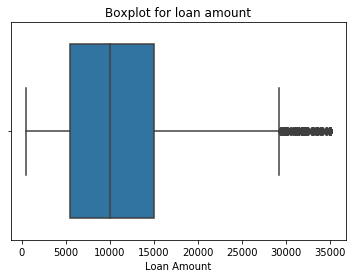

In [89]:
sns.boxplot(x = df['loan_amnt'])
plt.xlabel('Loan Amount')
plt.title('Boxplot for loan amount')
plt.show()

The boxplot reinforces the fact that majority of loans as concentreated below 15000  
<b> The loan amount varies from 0 to 35000, with median at 10000 </b>

Let us create two seperate dataframes, one containing only the charged off loans i.e the defaulted or risky loans and the other containing the fully paid loans.

In [90]:
df_default = df_master[df_master['loan_status'] =='Charged Off']

In [91]:
df_default.head()

,loan_amnt,term_in_months,int_rate%,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,2500,60,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,2013-04-01,119.66,2013-09-01,0.0,2011,12,1999-04-01,4
6,5375,60,12.69,121.45,B,B5,Starbucks,0.5,RENT,15000.0,Verified,2011-12-01,Charged Off,other,Building my credit history.,TX,18.08,0,2004-09-01,0,2,0,9279,36.50%,3,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,2012-11-01,121.45,2013-03-01,0.0,2011,12,2004-09-01,9
9,9000,36,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,debt_consolidation,freedom,VA,10.08,0,2004-04-01,1,4,0,10452,91.70%,9,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,2012-07-01,305.38,2012-11-01,0.0,2011,12,2004-04-01,4
11,10000,36,10.65,325.74,B,B2,SFMTA,3.0,RENT,100000.0,Source Verified,2011-12-01,Charged Off,other,Other Loan,CA,7.06,0,1991-05-01,2,14,0,11997,55.50%,29,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,2013-10-01,325.74,2014-03-01,0.0,2011,12,1991-05-01,5
18,21000,36,12.42,701.73,B,B4,Osram Sylvania,10.0,RENT,105000.0,Verified,2011-12-01,Charged Off,debt_consolidation,Debt Cleanup,FL,13.22,0,1983-02-01,0,7,0,32135,90.30%,38,0.0,0.0,14025.40,14025.40,10694.96,3330.44,0.0,0.00,0.0000,2013-09-01,701.73,2016-05-01,0.0,2011,12,1983-02-01,2


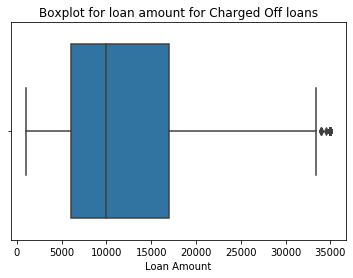

In [92]:
sns.boxplot(x = df_default['loan_amnt'])
plt.xlabel('Loan Amount')
plt.title('Boxplot for loan amount for Charged Off loans')
plt.show()

In [93]:
df_default['loan_amnt'].describe()

count     4943.000000
mean     12286.147077
std       8064.255961
min       1000.000000
25%       6000.000000
50%      10000.000000
75%      17000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

The majority of defaulted loans are <b> below 17000</b>  
It seems that the defaulted or charged off loans are concentrated in the range from about <b> 6000 to 17000 </b>  
Very few high valued loans turn out to be risky  

In [94]:
df_fullypaid = df_master[df_master['loan_status'] =='Fully Paid']

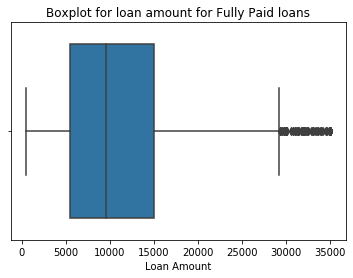

In [95]:
sns.boxplot(x = df_fullypaid['loan_amnt'])
plt.xlabel('Loan Amount')
plt.title('Boxplot for loan amount for Fully Paid loans')
plt.show()

In [96]:
df_fullypaid['loan_amnt'].describe()

count    30424.000000
mean     10945.731166
std       7181.867451
min        500.000000
25%       5500.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

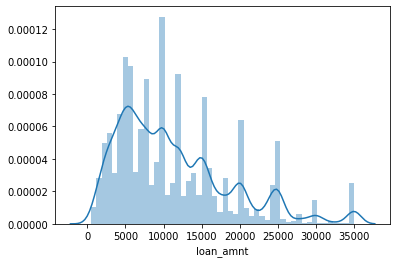

In [97]:
sns.distplot(df_master['loan_amnt'])
plt.show()

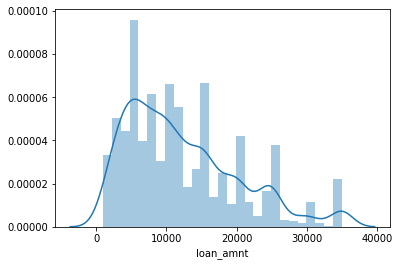

In [98]:
sns.distplot(df_default['loan_amnt'])
plt.show()

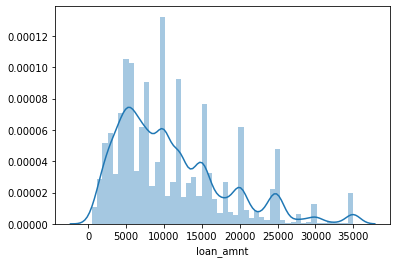

In [99]:
sns.distplot(df_fullypaid['loan_amnt'])
plt.show()

So we can see that the maximum density of loan amounts given peak around 5000 and it is in this region that the density of charged off loans also peaks.

#### Conclusion: Loans at about 5000 to 10000 are very popular but they also carry a high risk of default. Also towards the higher end, the charged off laons have a slightly higher density than the fully paid loans.

Now let us look at the main focus of our analysis, that is the loan status!

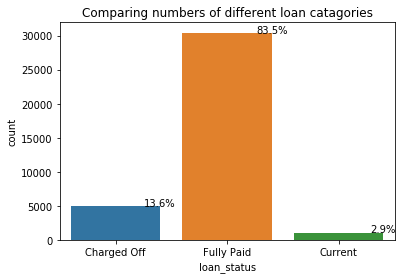

In [100]:
### First let's look at the different loan statuses in terms of their numbers
ax=sns.countplot(x=df_master['loan_status'])
plt.title('Comparing numbers of different loan catagories')
total = float(len(df_master))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [101]:
## checking exact figures
df_master['loan_status'].value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

##### We can see that the maximum number of loans have been paid off
##### Around 5000(4943 to be exact) loans are in the catagory were charged off i.e the risky laons
##### we are not concerned with the current loans for our analysis

## Looking at Grade

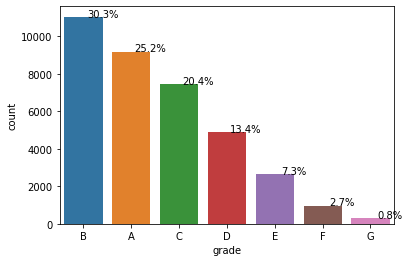

In [102]:
ax = sns.countplot(x='grade', data=df_master, order = df_master['grade'].value_counts().index)
total = float(len(df_master))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Most of the loans have grades A, B and C, indicating that most loans are high rated.

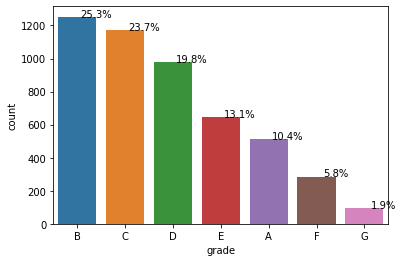

In [103]:
ax = sns.countplot(x='grade', data=df_default, order = df_default['grade'].value_counts().index)
total = float(len(df_default))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [104]:
df_default['grade'].value_counts()

B    1253
C    1170
D     980
E     648
A     513
F     286
G      93
Name: grade, dtype: int64

##### Loans with grades B and C, though high rated, also have a high chance of default

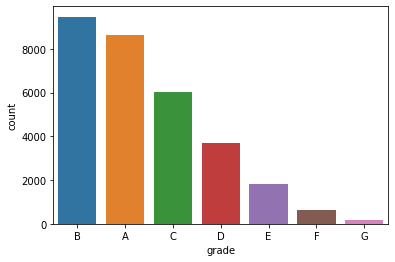

In [105]:
sns.countplot(x='grade', data=df_fullypaid , order = df_fullypaid['grade'].value_counts().index)
plt.show()

##### Less number of loans with lower Grades i.e D, E, F and G have been paid off fully. That reinforces the fact that these are low-grade, hence risky loans.

## Years of experience

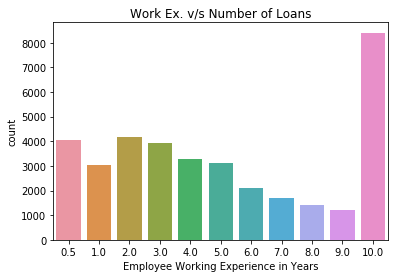

In [106]:
## plotting countplot for employee working experience
sns.countplot(x='emp_length_years', data=df_master)
plt.xlabel('Employee Working Experience in Years')
plt.title('Work Ex. v/s Number of Loans')
plt.show()

##### Maximum number of loans have been granted to those having 10 and above years of work experience
##### Those with lower years of experience seem to be taking high number of loans, indicating a propensity to spend more in the early years of their careers 
##### We see a dip in loans availed in the range 5-9 years.

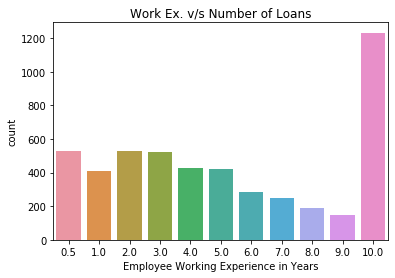

In [107]:
sns.countplot(x='emp_length_years', data=df_default)
plt.xlabel('Employee Working Experience in Years')
plt.title('Work Ex. v/s Number of Loans')
plt.show()

##### The numbers for charged off laons closely resemble the overall trend of borrowing 
#####  The numbers for charged off loans seem to be in proportion of the numbers of the laons availed

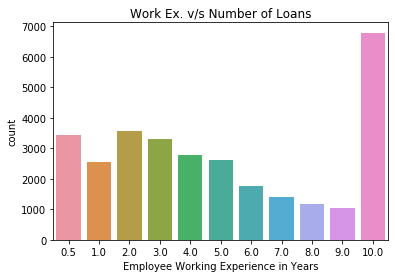

In [108]:
sns.countplot(x='emp_length_years', data=df_fullypaid)
plt.xlabel('Employee Working Experience in Years')
plt.title('Work Ex. v/s Number of Loans')
plt.show()

##### Higher the work experience, higher is the probability of loans being fully paid back.

## Looking at Purpose

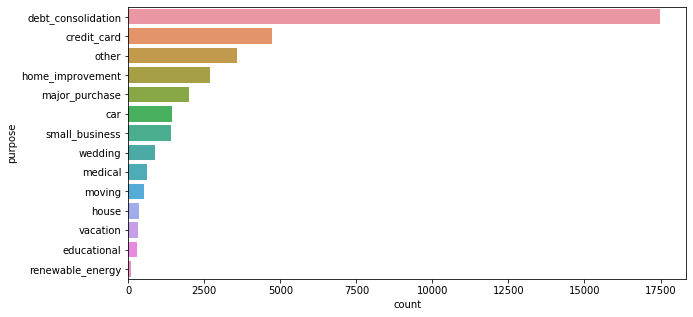

In [109]:
## looking at overall loans
plt.figure(num=None, figsize=(10, 5))
ax = sns.countplot(y= 'purpose', data = df_master, order = df_master['purpose'].value_counts().index)
plt.show()

##### Maximum number of laons have been disbursed for the purpose of debt_consolidation, followed by credit_card, other and home improvement.

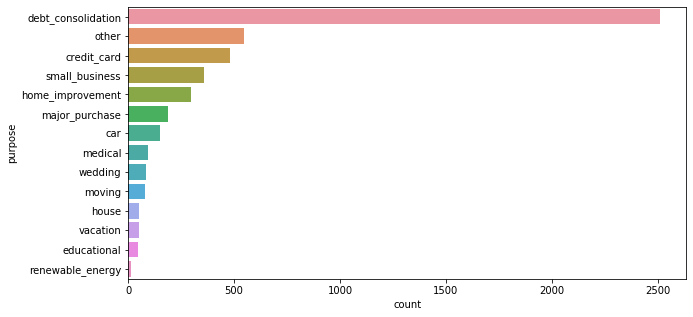

In [110]:
## looking at only at the charged off loans
plt.figure(num=None, figsize=(10, 5))
sns.countplot(y= 'purpose', data = df_default, order = df_default['purpose'].value_counts().index)
plt.show()

##### Though the trend in charged off loans follows the total laons trend, what is peculiar is that small bussinesses show a high rate of default as a proportion of loans disbursed to them.
##### This could indicate many things like a slowdown in the economy or lack of due-dilligence while advancing the loans, among other things.

## Looking at the year of issue of the Loan

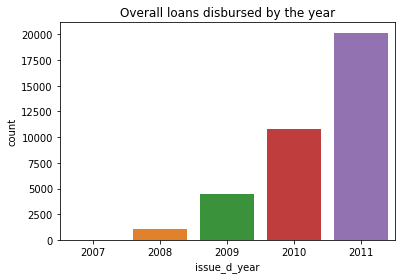

In [111]:
### Overall loans disbursed by the year
sns.countplot(x= 'issue_d_year', data = df_master)
plt.title('Overall loans disbursed by the year')
plt.show()

##### The number of loans disbursed have steadily increased since 2007
##### The year 2008 shows very low number of loans disbursed, this could be an indicator of the global recsession of 2008
##### The uptick in loan numbers could suggest recovery in the economy especially since 2010

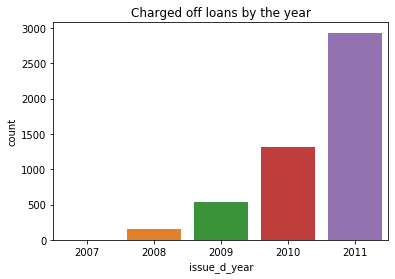

In [112]:
### Charged off loans disbursed by the year
sns.countplot(x= 'issue_d_year', data = df_default)
plt.title('Charged off loans by the year')
plt.show()

#### We see a similar trend for charged off loans. Hence we can say that the year of loan has no significant impact on the likelihood of default

### Looking at the Month of Disbursal

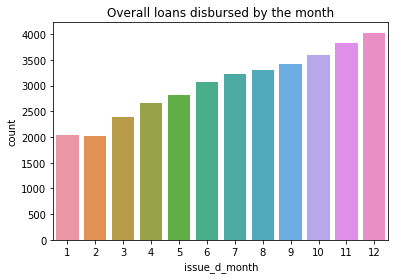

In [113]:
### Overall loans disbursed by the month
sns.countplot(x= 'issue_d_month', data = df_master)
plt.title('Overall loans disbursed by the month')
plt.show()

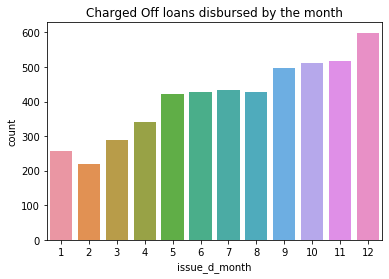

In [114]:
### Charged off loans disbursed by the month
sns.countplot(x= 'issue_d_month', data = df_default)
plt.title('Charged Off loans disbursed by the month')
plt.show()

#### The month of laon issued for charged off loans follows the overall trend. Hence we can say that it has no major impact for our analysis

### Looking at Home Ownership

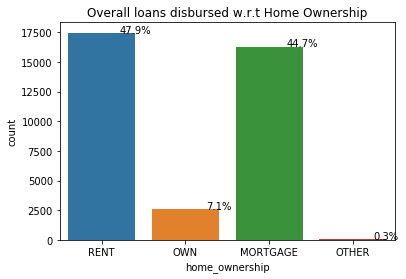

In [115]:
### Overall loans disbursed w.r.t Home Ownership
ax = sns.countplot(x= 'home_ownership', data = df_master)
plt.title('Overall loans disbursed w.r.t Home Ownership')
total = float(len(df_master))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

##### Those who own a home are taking less loans in comparison to the ones who are living on rent and mortgage.
##### This could indicate that those living on rent and mortage are seeking more house loans to buy a house among other things
##### Or it could also indicate that these people don't have substantial savings or assets and they go for more loan taking behaviour.
##### These people represent potential customers but other things should be taken into copnsideration before advacning loans to them.

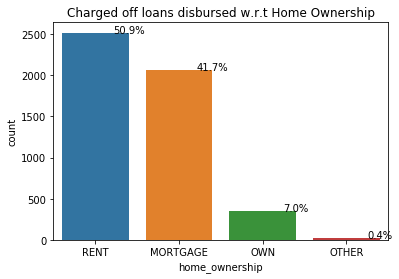

In [116]:
### Charged off loans disbursed w.r.t Home Ownership
ax = sns.countplot(x= 'home_ownership', data = df_default)
plt.title('Charged off loans disbursed w.r.t Home Ownership')
total = float(len(df_default))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

#### Those living on rent and mortage have a high probability of loans being charged off

## Looking at Term 

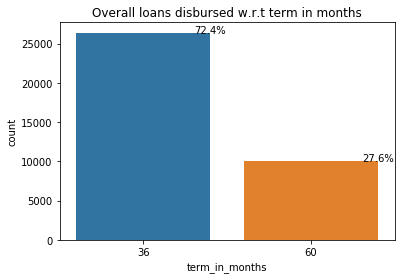

In [117]:
### Overall loans disbursed w.r.t term in months
ax = sns.countplot(x= 'term_in_months', data = df_master)
plt.title('Overall loans disbursed w.r.t term in months')
total = float(len(df_master))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

#### The shorter term loans i.e 36 months are more popular than the long term loans of 60 months

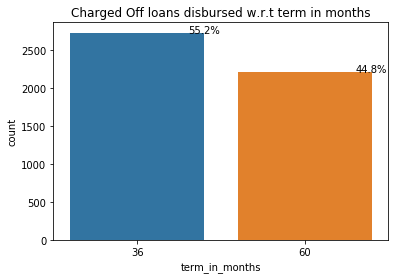

In [118]:
### Charged off loans disbursed w.r.t term in months
ax = sns.countplot(x= 'term_in_months', data = df_default)
plt.title('Charged Off loans disbursed w.r.t term in months')
total = float(len(df_default))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

#### 36 month term loans are very popular and they also have a higher default rate.

## Verification Status

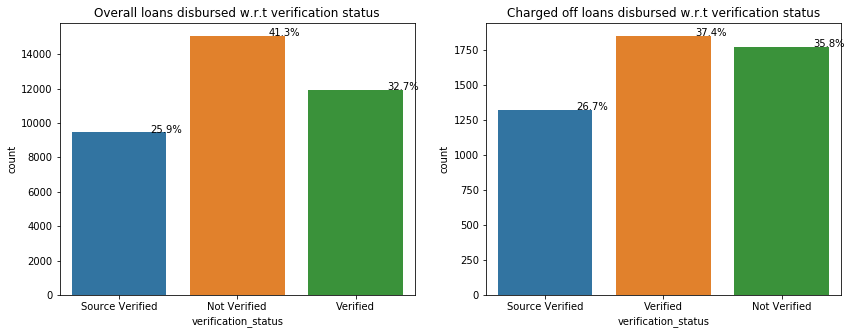

In [119]:
### Overall loans and charged off w.r.t verification status 

plt.figure(num=None, figsize=(14, 5))           
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x= 'verification_status', data = df_master)
plt.title('Overall loans disbursed w.r.t verification status')

plt.subplot(1, 2, 2)
ax2 = sns.countplot(x= 'verification_status', data = df_default)
plt.title('Charged off loans disbursed w.r.t verification status')

total_main = float(len(df_master))

total_default = float(len(df_default))
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_main)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_default)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')


plt.show()

##### The number of loans that are not verified exceed both the source verified and verified loan categories. And these not verified loans have a very high rate of being charged off. This is a matter of concern and the company should take due diligence before advancing loans.

## Public Record of Bankruptcy

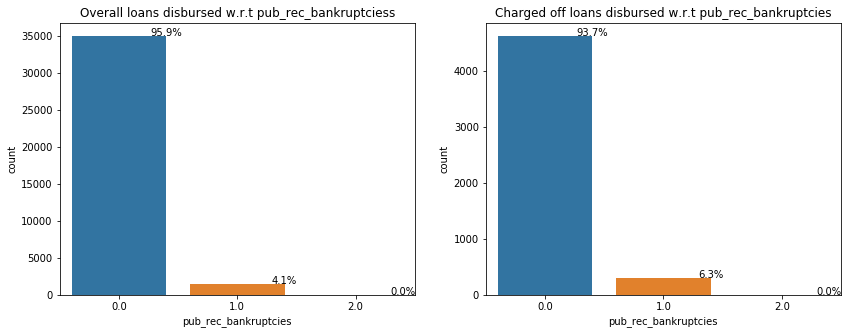

In [120]:
### Overall loans and charged off w.r.t pub_rec_bankruptcies

plt.figure(num=None, figsize=(14, 5))           
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x= 'pub_rec_bankruptcies', data = df_master)
plt.title('Overall loans disbursed w.r.t pub_rec_bankruptciess')

plt.subplot(1, 2, 2)
ax2 = sns.countplot(x= 'pub_rec_bankruptcies', data = df_default)
plt.title('Charged off loans disbursed w.r.t pub_rec_bankruptcies')

total_main = float(len(df_master))

total_default = float(len(df_default))
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_main)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_default)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')

plt.show()

##### Very few accounts with prior bankruptcy record are given loans. The accounts with prior bankruptcy record that do get laons, have a high probability of being charged off.

## Looking at Interest Rates

In [121]:
df_master['int_rate%'].describe()

count    36433.000000
mean        12.073862
std          3.734758
min          5.420000
25%          9.320000
50%         11.860000
75%         14.650000
max         24.400000
Name: int_rate%, dtype: float64

 We are going top create buckets for analysis of interest rates

In [122]:
bins = np.array([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])

In [123]:
## buckets for analysis of interest rates of master dataframe
df_master["bucket"] = pd.cut(df_master['int_rate%'],bins)

In [124]:
## buckets for analysis of interest rates of default dataframe
df_default["bucket"] = pd.cut(df_default['int_rate%'],bins)

C:\Users\Tasheer\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [125]:
 df_master["bucket"]

0        (15, 16]
1        (13, 14]
2        (12, 13]
3          (7, 8]
4        (15, 16]
           ...   
36428    (10, 11]
36429    (10, 11]
36430    (12, 13]
36431    (11, 12]
36432    (11, 12]
Name: bucket, Length: 36433, dtype: category
Categories (20, interval[int64]): [(5, 6] < (6, 7] < (7, 8] < (8, 9] ... (21, 22] < (22, 23] < (23, 24] < (24, 25]]

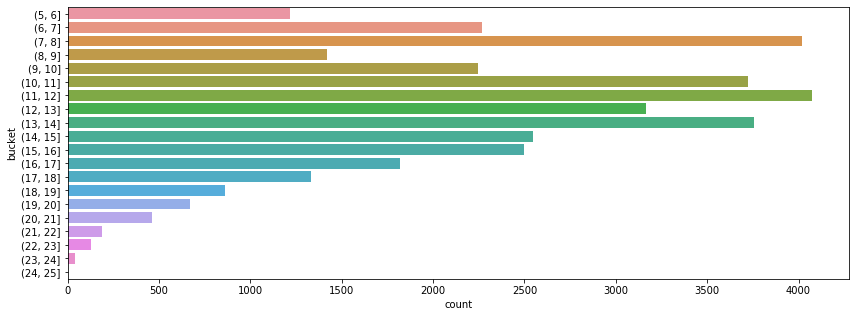

In [126]:
plt.figure(num=None, figsize=(14, 5))
sns.countplot(y = df_master["bucket"])
plt.show()

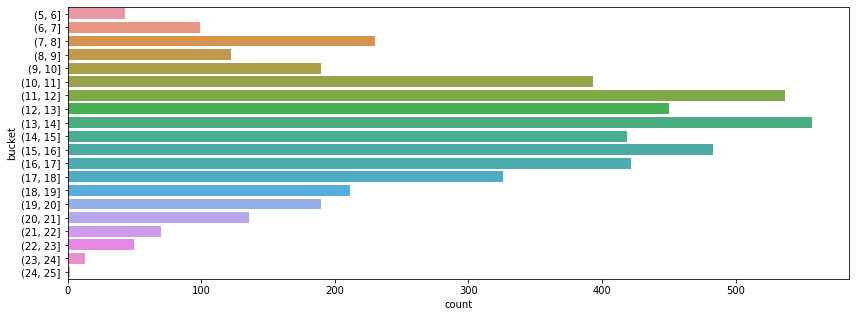

In [127]:
plt.figure(num=None, figsize=(14, 5))
sns.countplot(y = df_default["bucket"])
plt.show()

Loans with higher rate of interest have a higher percentage of being charged off as compared to lower interest rates.

## Looking at delinq_2yrs

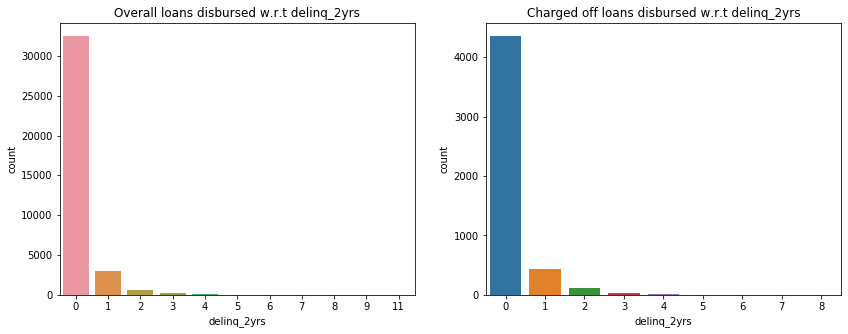

In [128]:
### Overall loans and charged off w.r.t delinq_2yrs

plt.figure(num=None, figsize=(14, 5))           
plt.subplot(1, 2, 1)
sns.countplot(x= 'delinq_2yrs', data = df_master)
plt.title('Overall loans disbursed w.r.t delinq_2yrs')

plt.subplot(1, 2, 2)
sns.countplot(x= 'delinq_2yrs', data = df_default)
plt.title('Charged off loans disbursed w.r.t delinq_2yrs')

plt.show()

#### Those borrowers with even one icidence of the number of 30+ days past-due incidences of delinquency in their credit file for the past 2 years are getting a very few number of loans.
#### The loans advanced to such borrowers reduce wuth the increase in the number of such incidents
#### Where loans were advanced to such borrowers,. those loans have a high probability of being charged off.
#### Lending to such borrowers is a risky proposition.

## Let us look at addr_state

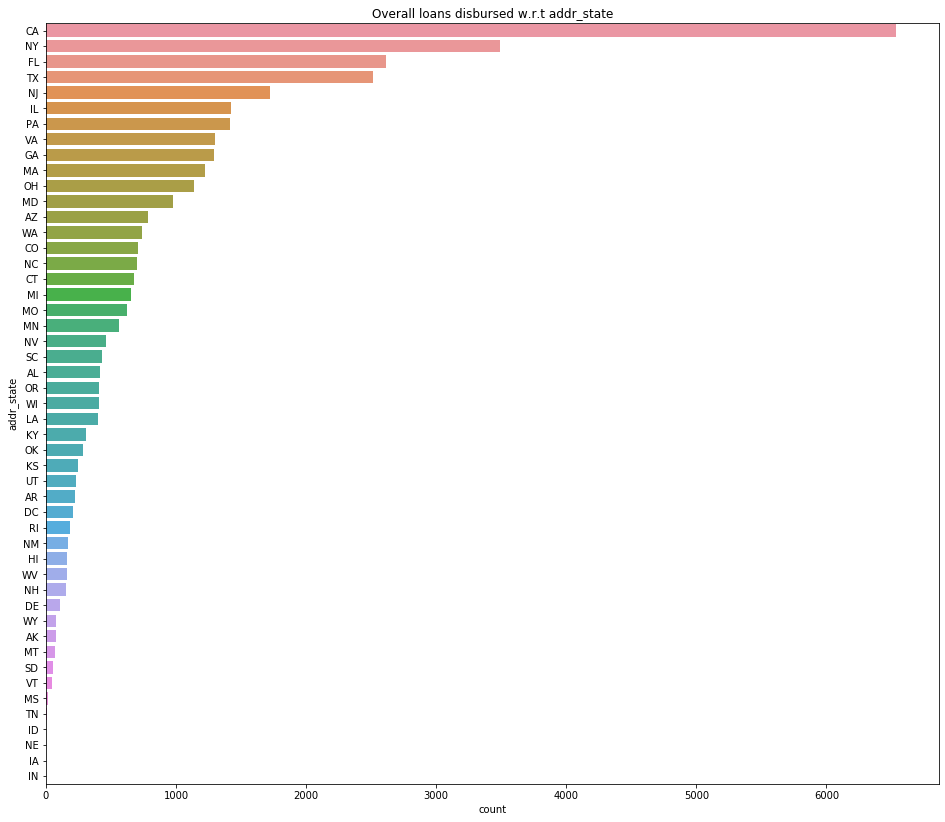

In [129]:
## loan disbursal wrt to addr state
plt.figure(num=None, figsize=(16, 14))
sns.countplot(y= 'addr_state', data = df_master, order =df_master['addr_state'].value_counts().index)
plt.title('Overall loans disbursed w.r.t addr_state')
plt.show()

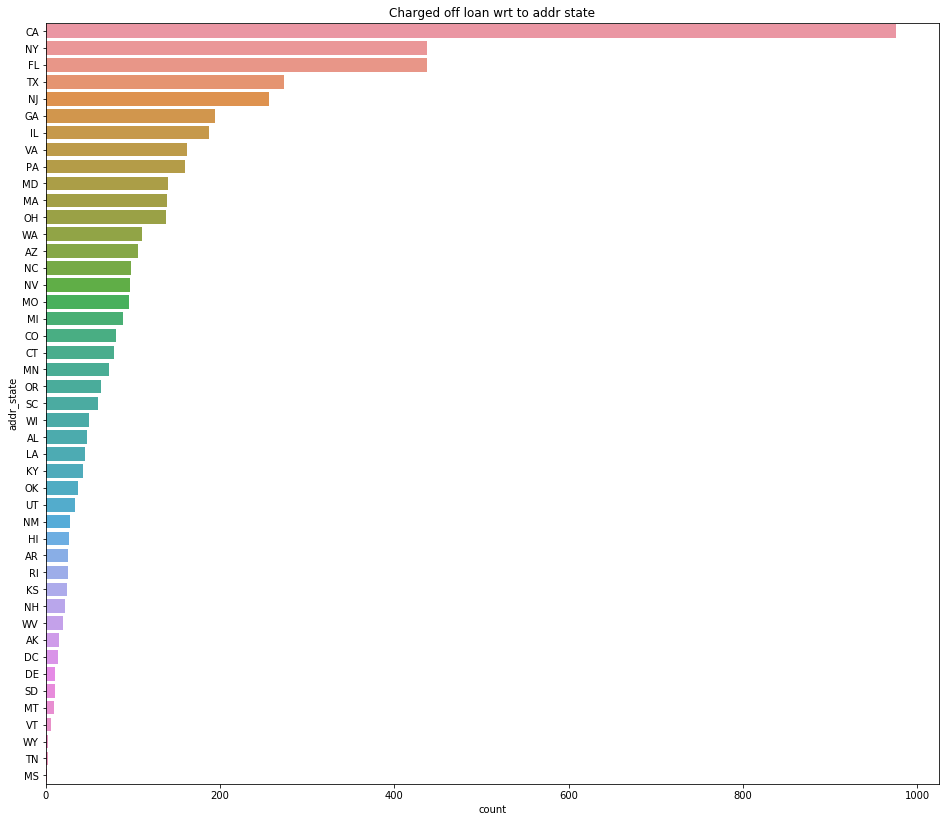

In [130]:
## Charged off loan wrt to addr state
plt.figure(num=None, figsize=(16, 14))
sns.countplot(y= 'addr_state', data = df_default, order =df_default['addr_state'].value_counts().index )
plt.title('Charged off loan wrt to addr state')
plt.show()

##### City wise the loan disbursal and the charged off loans follow more or less the same trend, hence at this point we can say that this variable does not have much impact on our analysis. However we will be going for better analysis of this in the bivariate analysis.

## Looking at dti 

In [131]:
#creating bins for df_master
df_master['dti_bin'] = pd.cut(df_master['dti'], [0,5,10,15,20,25,30],labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

In [132]:
#creating bins for df_default
df_default['dti_bin'] = pd.cut(df_default['dti'], [0,5,10,15,20,25,30],labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

C:\Users\Tasheer\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


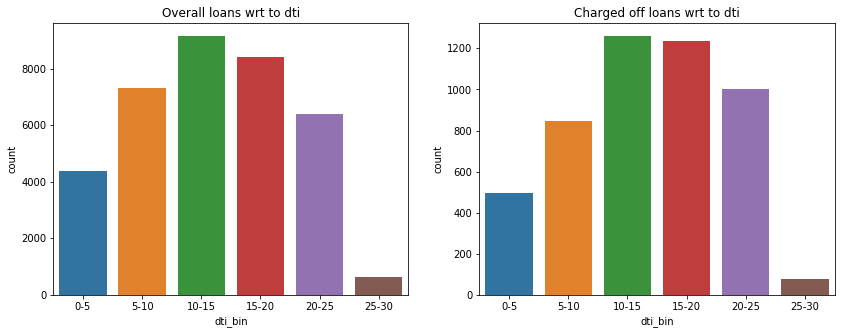

In [133]:
## Overall loans and Charged off loans wrt to dti
plt.figure(num=None, figsize=(14, 5))           
plt.subplot(1, 2, 1)
sns.countplot(x = df_master['dti_bin'])
plt.title('Overall loans wrt to dti')
plt.subplot(1, 2, 2)
sns.countplot(x = df_default['dti_bin'])
plt.title('Charged off loans wrt to dti')

plt.show()

##### Trends in dti for charged off loans follow the trends for overall loans, except in the bin 20-25, which means that for dti between 20-25, there is a higher probability of loans being charged off

## Looking at earliest_cr_line

In [134]:
df_master['earliest_cr_line_year'] = df_master['earliest_cr_line_year'].dt.year

In [135]:
df_master['earliest_cr_line_year']

0        1999.0
1        1996.0
2        1996.0
3        2004.0
4        2005.0
          ...  
36428    2000.0
36429    2000.0
36430    1997.0
36431    1992.0
36432    2000.0
Name: earliest_cr_line_year, Length: 36433, dtype: float64

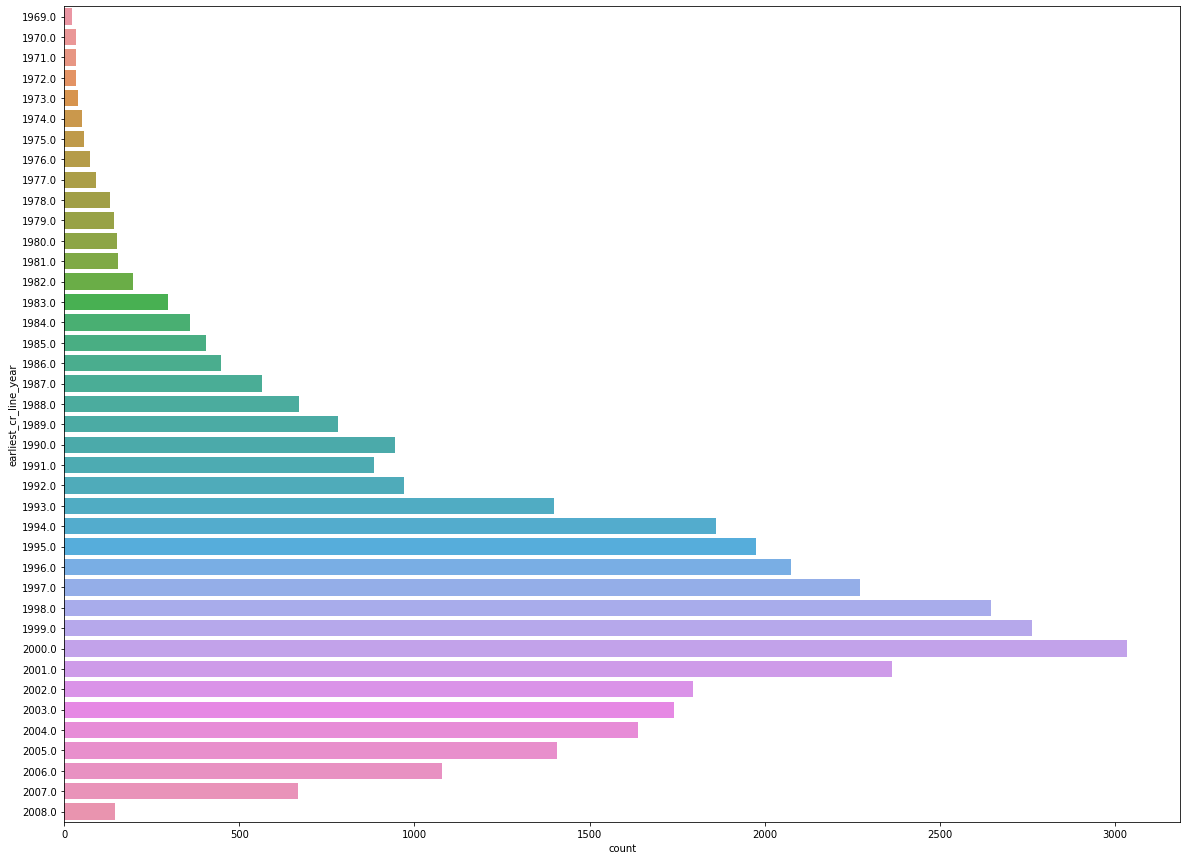

In [136]:
plt.figure(num=None, figsize=(20,15))
sns.countplot(y= 'earliest_cr_line_year', data = df_master)
plt.show()

In [137]:
df_default['earliest_cr_line_year'] = df_default['earliest_cr_line_year'].dt.year

C:\Users\Tasheer\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
df_default['earliest_cr_line_year']

0        1999.0
6        2004.0
9        2004.0
11       1991.0
18       1983.0
          ...  
36420    2001.0
36423    2001.0
36424    1989.0
36430    1997.0
36431    1992.0
Name: earliest_cr_line_year, Length: 4943, dtype: float64

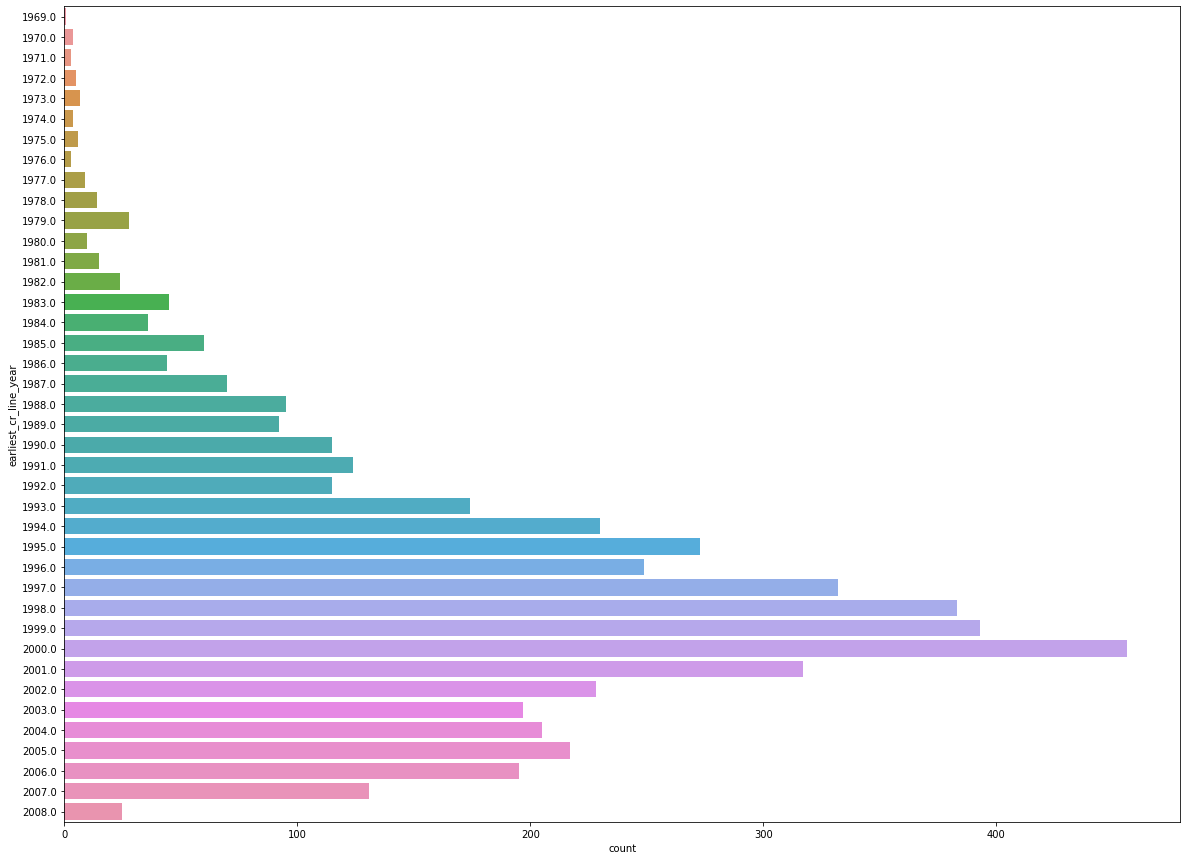

In [139]:

plt.figure(num=None, figsize=(20,15))
sns.countplot(y= 'earliest_cr_line_year', data = df_default)
plt.show()

##### The earliest_cr_line_year trends are alomst identical for both total loans disbursed and loans charged off. As such this wont really help in our ananlysis

### Looking at public record

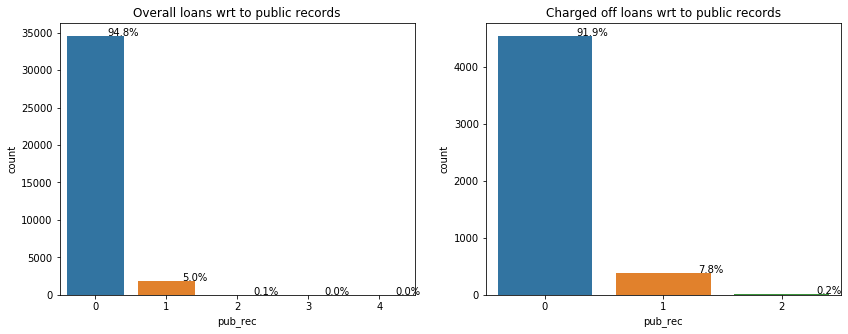

In [140]:
## Overall laons and Charged off loans wrt to public records
plt.figure(num=None, figsize=(14, 5))           
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x = df_master['pub_rec'])
plt.title('Overall loans wrt to public records')
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x = df_default['pub_rec'])
plt.title('Charged off loans wrt to public records')

total_main = float(len(df_master))

total_default = float(len(df_default))
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_main)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
    
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_default)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')

plt.show()

##### Having derogatory public record seriously undermines the ability of a borrower to obtain a loan. Further those who do manage to get a loan display a proportionate chance of default.

# Bivariate Analysis 

In [141]:
df_master['loan_amnt'].describe()

count    36433.000000
mean     11307.679851
std       7433.859357
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

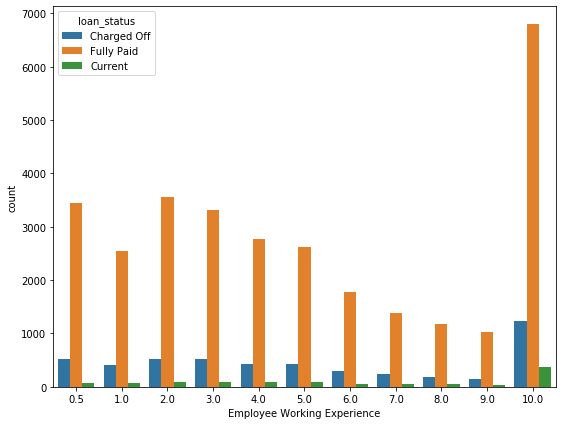

In [142]:
### combining the emp_length_years and loan status  into one graph
plt.figure(num=None, figsize=(9, 7))
sns.countplot(x='emp_length_years', hue='loan_status', data=df_master)
plt.xlabel('Employee Working Experience')
plt.show()

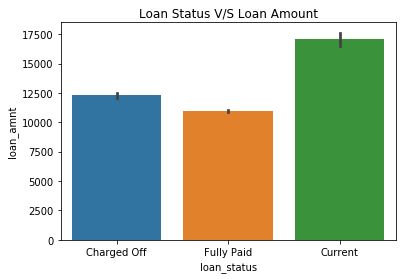

In [143]:
sns.barplot(x='loan_status', y='loan_amnt', data=df_master)
plt.title('Loan Status V/S Loan Amount')
plt.show()

Let us begin by analysing the relationship between loan amount and the annual income.   
 Since there are so many values involved, plotting them would pose a challenge.  
So we are going to create bins for the variable loan_amnt  

In [144]:
#creating bins for df_master['loan_amnt']
df_master['loan_amnt_bin'] = pd.cut(df_master['loan_amnt'], [0,5000,10000,15000,20000,25000,30000,35000],labels=['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000'])

In [145]:
#creating bins for df_default['loan_amnt']
df_default['loan_amnt_bin'] = pd.cut(df_default['loan_amnt'], [0,5000,10000,15000,20000,25000,30000,35000],labels=['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000'])

C:\Users\Tasheer\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


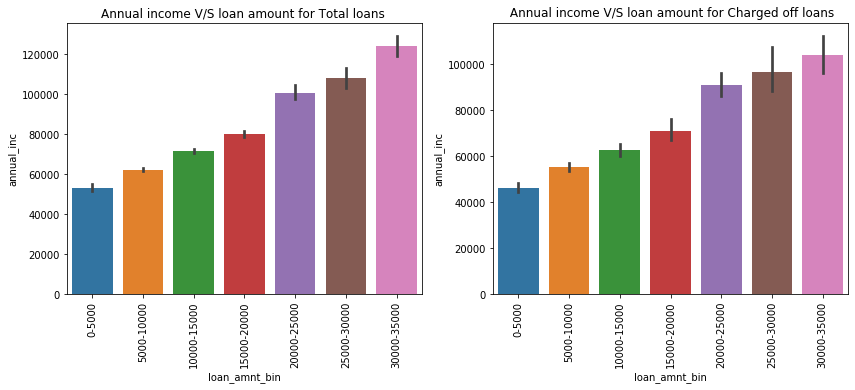

In [146]:
## Annual income V/S loan amount for total loans and charged off loans
plt.figure(num=None, figsize=(14, 5))           
plt.subplot(1, 2, 1)
sns.barplot(y='annual_inc', x='loan_amnt_bin', data=df_master)
plt.xticks(rotation=90)
plt.title('Annual income V/S loan amount for Total loans ')
plt.subplot(1, 2, 2)
sns.barplot(y='annual_inc', x='loan_amnt_bin', data=df_default)
plt.xticks(rotation=90)
plt.title(' Annual income V/S loan amount for Charged off loans')

plt.show()

#### Both the graphs look almost identical amnd hence provide no soild insights.
#### We just get the basic insights from these graphs like high income groups also take high value loans.
#### But from common sense and basic understanding of loans, we know that there has to be some relationship between the annual income and loan amount.
#### Since the relationship between the loan amount and annual income is not so clear from both the graphs. 
#### Let us create two variables ratio and ratio_d which represent the ratio between loan amount and the annual income for both df_master and df_default respectively.

In [147]:
## Creating ratio for df_master
ratio = round(df_master['loan_amnt']/df_master['annual_inc']*100)

In [148]:
## Creating ratio_d for df_default
ratio_d = round(df_default['loan_amnt']/df_default['annual_inc']*100)

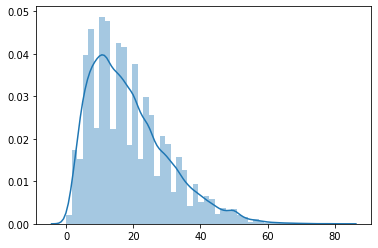

In [149]:
sns.distplot(ratio)
plt.show()

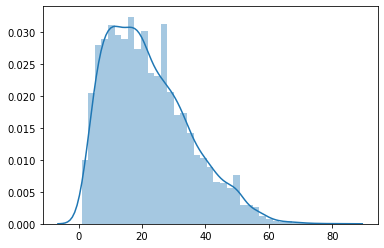

In [150]:
sns.distplot(ratio_d)
plt.show()

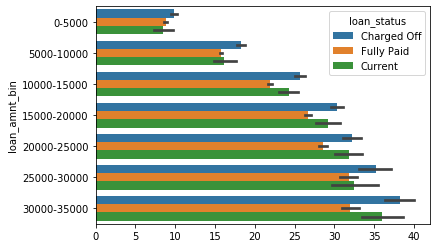

In [151]:
sns.barplot(x = ratio,y = 'loan_amnt_bin',hue='loan_status',data=df_master)
plt.show()

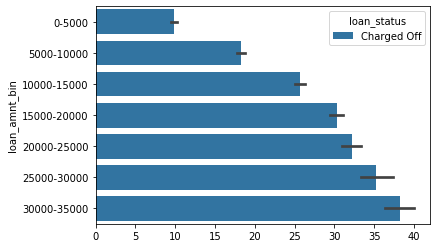

In [152]:
sns.barplot(x = ratio_d,y = 'loan_amnt_bin',hue='loan_status',data=df_default)
plt.show()

##### We can see that when the ratio between loan amount and annual income exceeds 20%, the numbers of charged off loans increases.

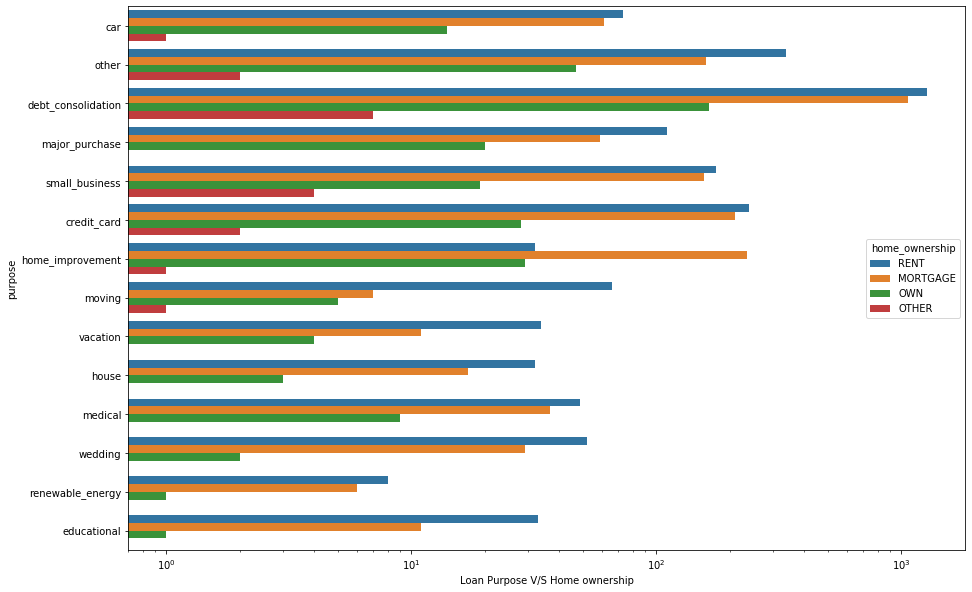

In [153]:
plt.figure(num=None, figsize=(15, 10))
ax = sns.countplot(y='purpose', hue='home_ownership', data=df_default)
ax.set_xscale('log')
plt.xlabel('Loan Purpose V/S Home ownership')
plt.show()

#### Those living on rent and mortgage have a high propensity to seek out loans. These could be potential target customers.
#### Likelihood of default for those who live on rent and mortgage is high among all the puposes. This strongly indicates a risky borrowing behaviour.
#### Peculiar observation: Those who live on mortgage and take loans for home improvement have a very high chance of their loans being charged off!

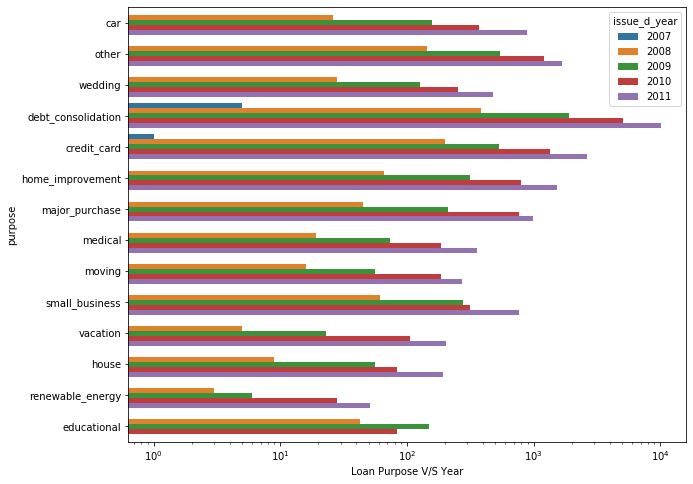

In [154]:
plt.figure(num=None, figsize=(10, 8))
ax = sns.countplot(y='purpose', hue='issue_d_year', data=df_master)
plt.xlabel('Loan Purpose V/S Year')
ax.set_xscale('log')
plt.show()

## Exploring the relatioinship between number of loans and the years

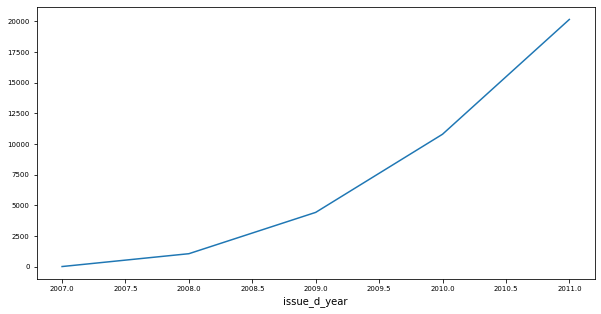

In [155]:
### Exploring the relatioinship between number of loans and the years
plt.figure(figsize=(10,5))
df_master.groupby('issue_d_year').loan_status.count().plot(kind='line', fontsize=7)
plt.show()

#### The number of loans issued have steadily incresed since 2007. 

### Average loan amount over time

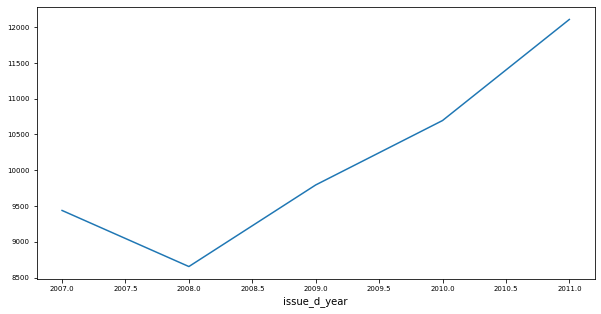

In [156]:
plt.figure(figsize=(10,5))
df_master.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

#### There was a sharp dip in average loan amounts in 2008 and since then, there has been a steady rise in loan amount averages with time.

## Relationship between grade and loan amount

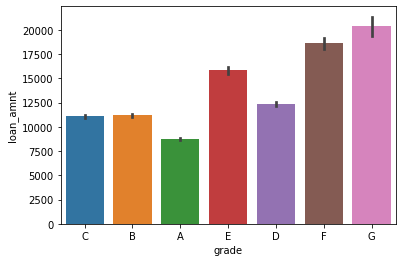

In [157]:
sns.barplot(y= 'loan_amnt', x='grade',data= df_master)
plt.show()

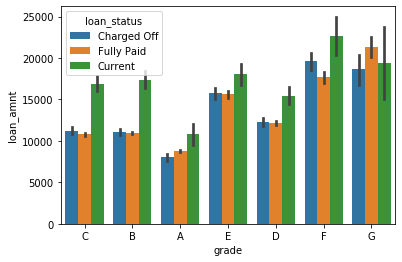

In [158]:
sns.barplot(y= 'loan_amnt', x='grade',hue='loan_status',data= df_master)
plt.show()

##### We can see from here that lower grade loans are of a higher amount. These loans are also showing very high rates of being charged off. This is a very risky lending behaviour and LC should curb this practice in future.

## Relationship between term and loan amount

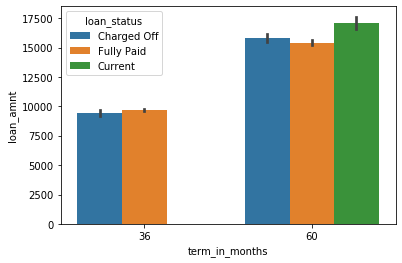

In [159]:
sns.barplot(y= 'loan_amnt', x='term_in_months',hue='loan_status',data= df_master)
plt.show()

#### The 60 month tenure loans are more popular for higher loan amounts, but they also have a very high rate of loans being charged off. In fact for 60 month tenure, the charged off loans are slightly higher than the fully paid loans in terms of laon amounts.
#### We can say that for high valued loans, the loan term of 60 months is a very risky proposition.

### Relationship between Loan amount and addr_state

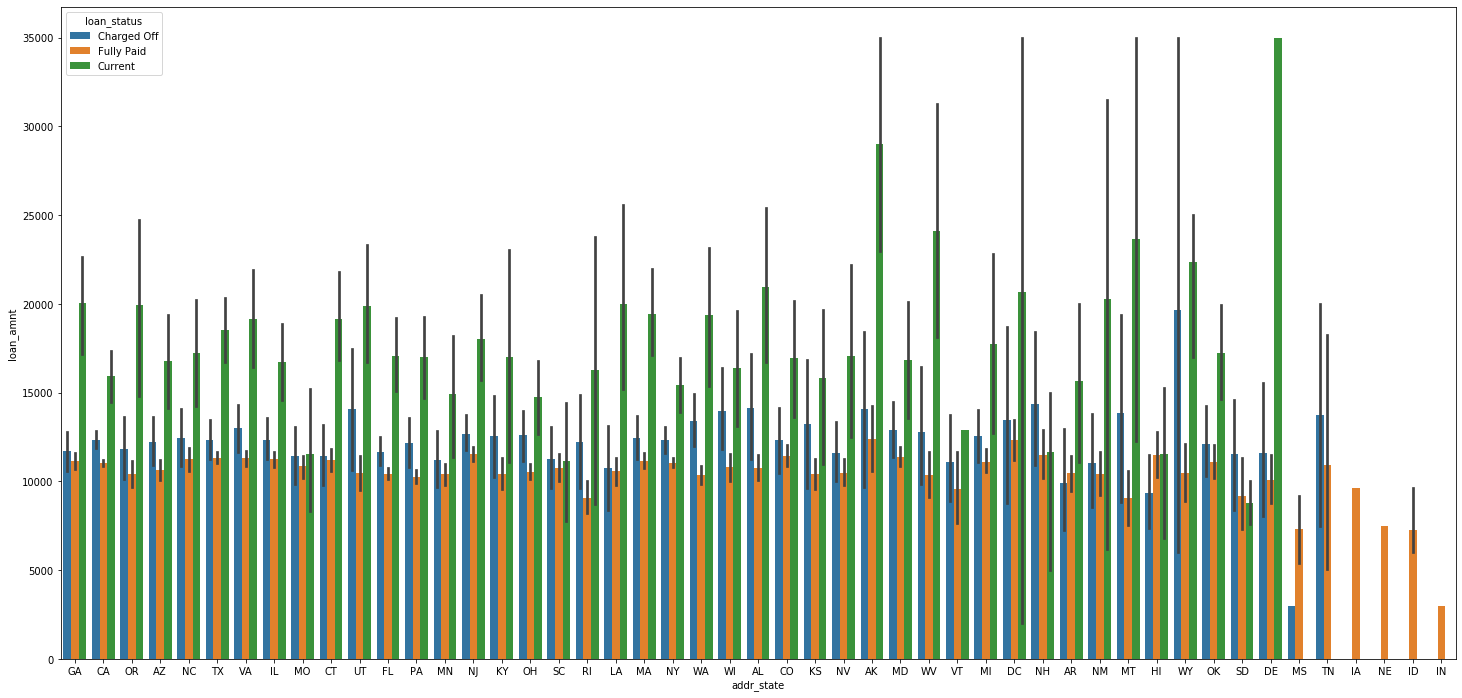

In [160]:
plt.figure(figsize=(25,12))
sns.barplot(y= 'loan_amnt', x='addr_state',hue='loan_status',data= df_master)
plt.show()

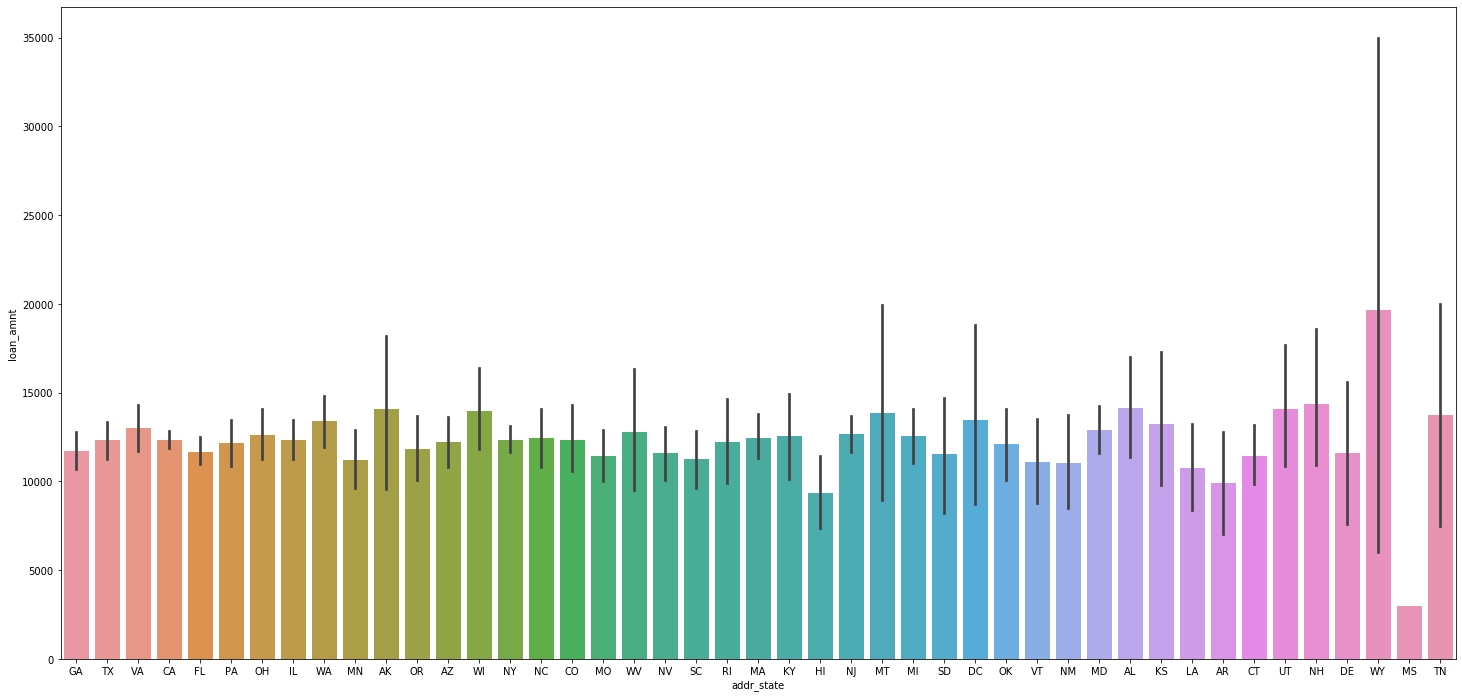

In [161]:
plt.figure(figsize=(25,12))
sns.barplot(y= 'loan_amnt', x='addr_state',data= df_default)
plt.show()

##### In terms of loan amount, the state of wyonming has the highest average loan amount that was charged off. So this state clearly reprsents a risk catagory.
##### The top 5 risky states in terms of loan amounts being charged off are:
#### 1. Wyonmimg 2. Tennessee 3. NH 4. Arakansas 5. Alaska


## Relationship between loan amount and verification status

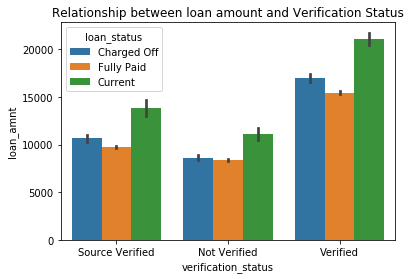

In [162]:
sns.barplot(y= 'loan_amnt', x='verification_status',hue='loan_status',data= df_master)
plt.title('Relationship between loan amount and Verification Status')
plt.show()

#### In therms of value of loan amount, the not-verified loans are the lowest. But among these not-verified loan catagory, the charged off loans value exceeds the fully paid loans value.
#### Though the higher loans are less in numbers, they have a high probability of being charged off.
#### More due dilligence is displayed in terms of verification for higher valued loans

## Relationship between interest rate and term

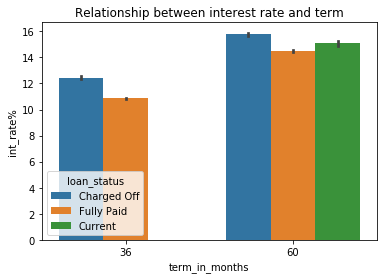

In [163]:
sns.barplot(y= 'int_rate%', x='term_in_months',hue='loan_status',data= df_master)
plt.title('Relationship between interest rate and term')
plt.show()

#### Higher rate of interests are being charged for longer term loans
#### For the 36 month tenured loans, the charged off loans start exceeding the fully paid loans in the interest rate region of about 10.5%-11%.
#### For the 60 month tenured loans, the charged off loans start exceeding the fully paid loans in the interest rate region of about 14%.
#### So, considering other things, the maximum interest rates to avoid charge offs could be below10% for 36 months loans and Below 14% for 60 month loans


## Relationship between interest rate and loan amount 

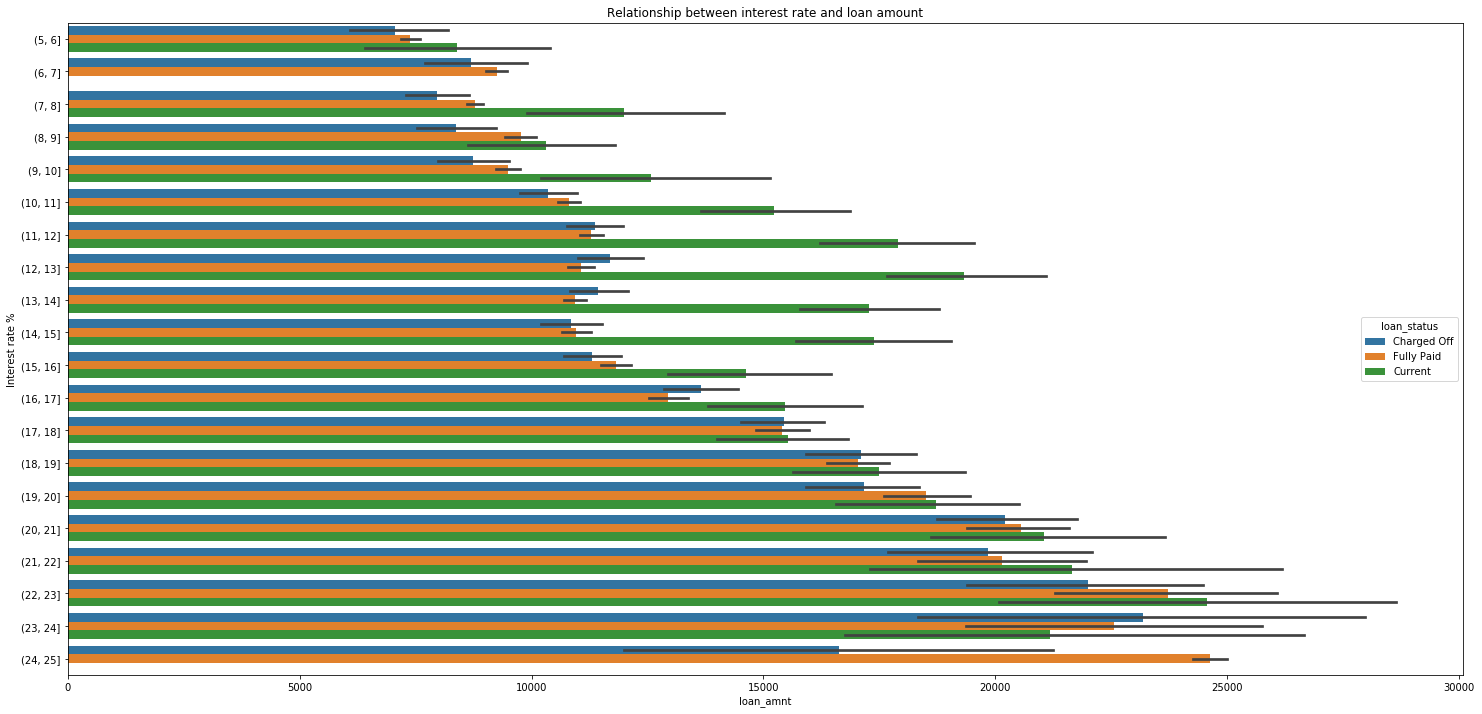

In [164]:
plt.figure(figsize=(25,12))
sns.barplot(y='bucket', x='loan_amnt',hue='loan_status',data= df_master)
plt.ylabel('Interest rate %')
plt.title('Relationship between interest rate and loan amount')
plt.show()

#### Interest rates are rising with the increase in loan amounts.
#### In the range of 11%-14% and 16%-19%, we see the charged off loans exceeding the fully paid loans.
#### From 19% onwards we see the fully paid loans exceeding the charged off loans with the exception in the range 23%-24%.
#### We can see that the loans with values higher than 15000 are genreally paid back more, even though they charge a higher rate of interest, with the exception in the range 23%-24%.


## Relationship between delinq_2yrs and loan amount


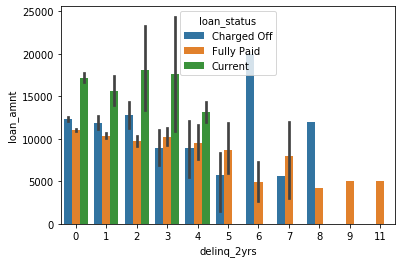

In [165]:
sns.barplot(x='delinq_2yrs', y='loan_amnt',hue='loan_status',data= df_master)
plt.show()

#### With rising numbers of delinq_2yrs, loan amounts being given are falling.
#### From  delinq_2yrs incidents in the range 2-5, there is a general trend of charged off loans falling. This could be due to smaller amounts of loans offered.
#### We see a mssive spike in the charged off loans amounts for  delinq_2yrs value of 6!

## Relationship between delinq_2yrs and interest rate

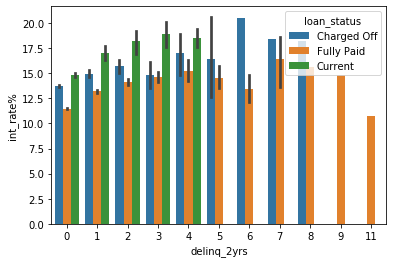

In [166]:
sns.barplot(x='delinq_2yrs', y='int_rate%',hue='loan_status',data= df_master)
plt.show()

#### With the rise in delinq_2yrs incidents, the inrterest rates are also rising, which means LC is trying to cover the risk of such loans
#### But with higher interest rates the chances of loan being charged off are also rising.


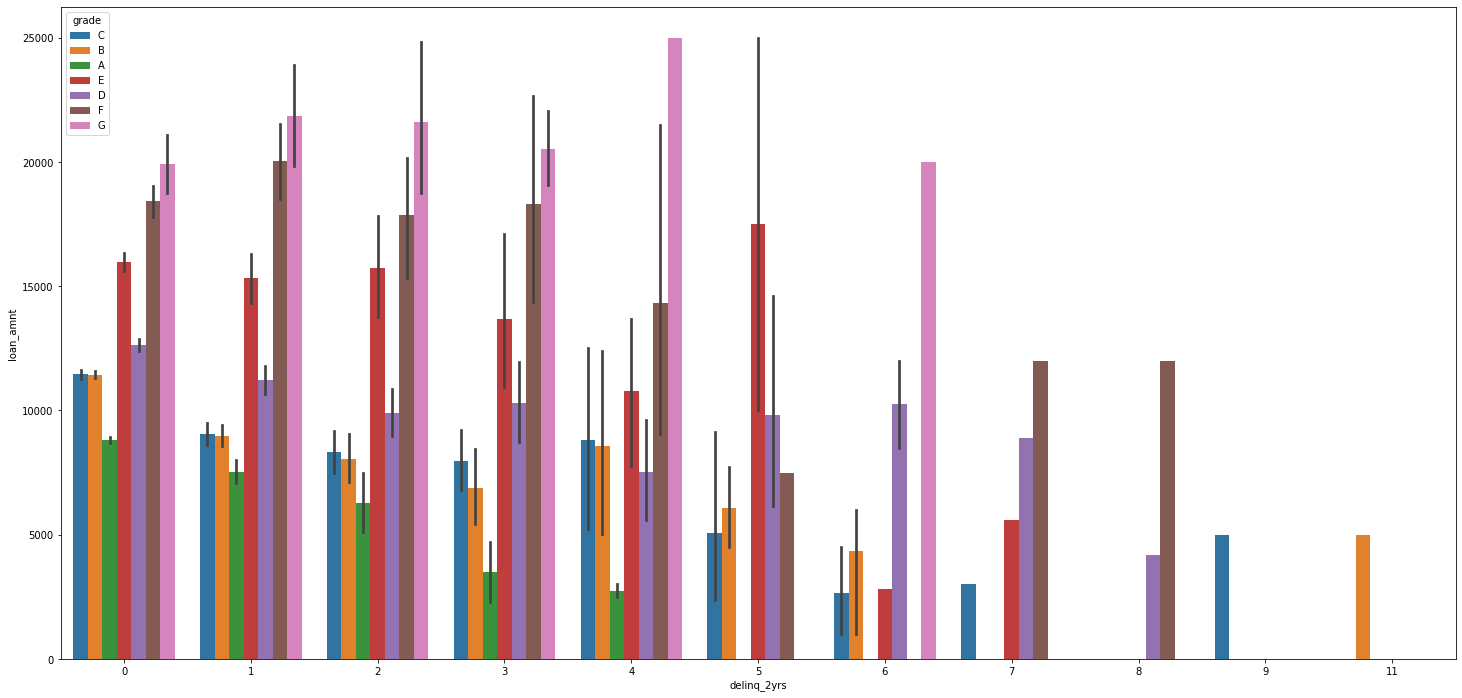

In [167]:
plt.figure(figsize=(25,12))
sns.barplot(x='delinq_2yrs', y='loan_amnt',hue='grade',data= df_master)
plt.show()

##### With higher record of delinq_2yrs, as expected,  the grades of the loans are deteriorating, except for delinq_2yrs value at 4, where we actually see a rise in grade B and C loans. This could indicate a lack of due dilligence from LC. 

## Checking the relationship between total account and delinq_2yrs

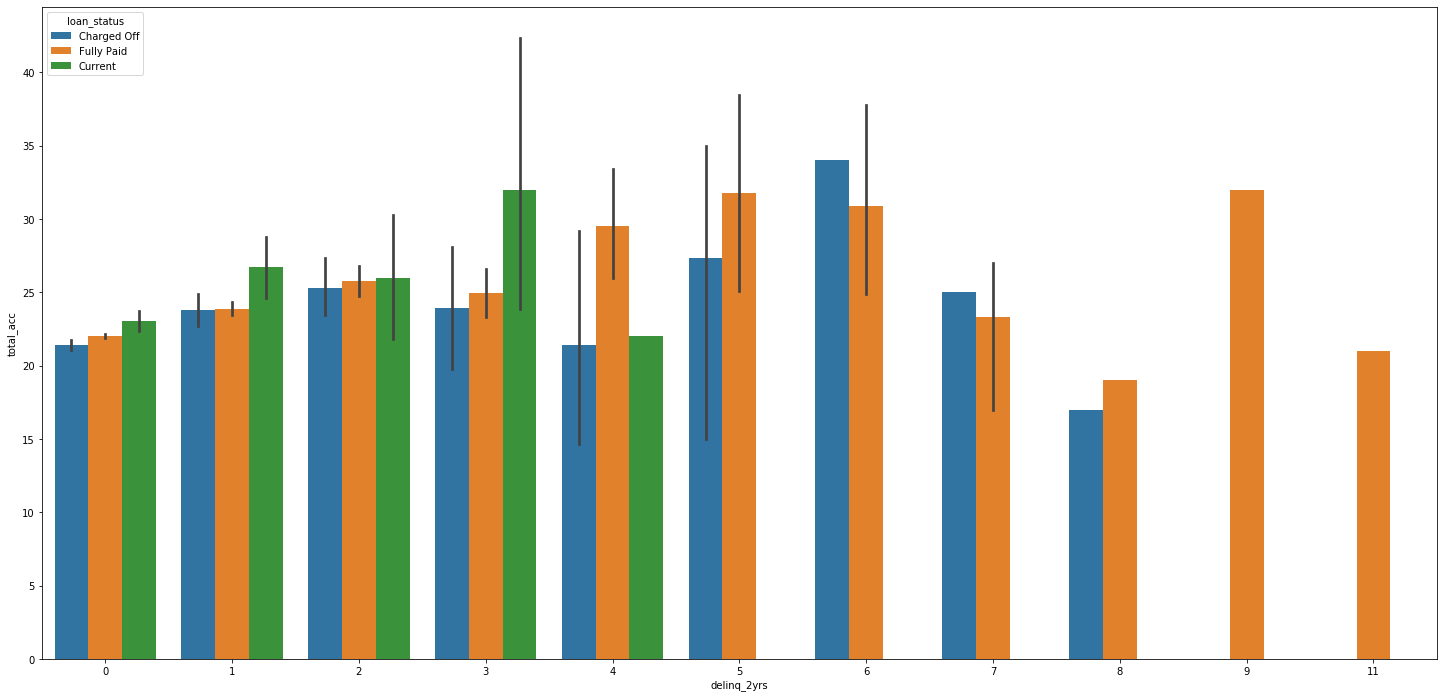

In [168]:
plt.figure(figsize=(25,12))
sns.barplot(x='delinq_2yrs', y='total_acc',hue='loan_status',data= df_master)
plt.show()

#### We cannot determine a clear trend from here, we will explore this with a heatplot

## Checking the relationship between total account and open_acc

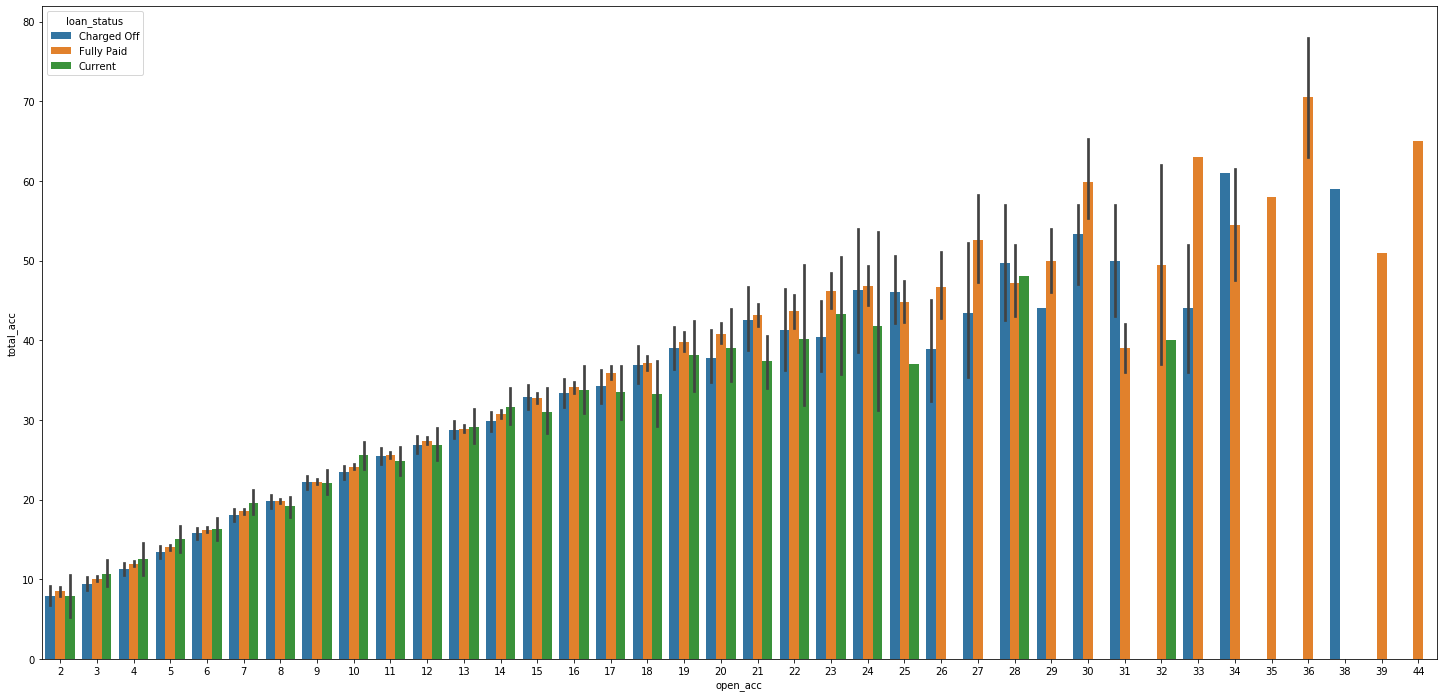

In [169]:
plt.figure(figsize=(25,12))
sns.barplot(x='open_acc', y='total_acc',hue='loan_status',data= df_master)
plt.show()

#### The total accounts and open accounts have a positive correlation

## Checking the relationship between total account and delinq_2yrs

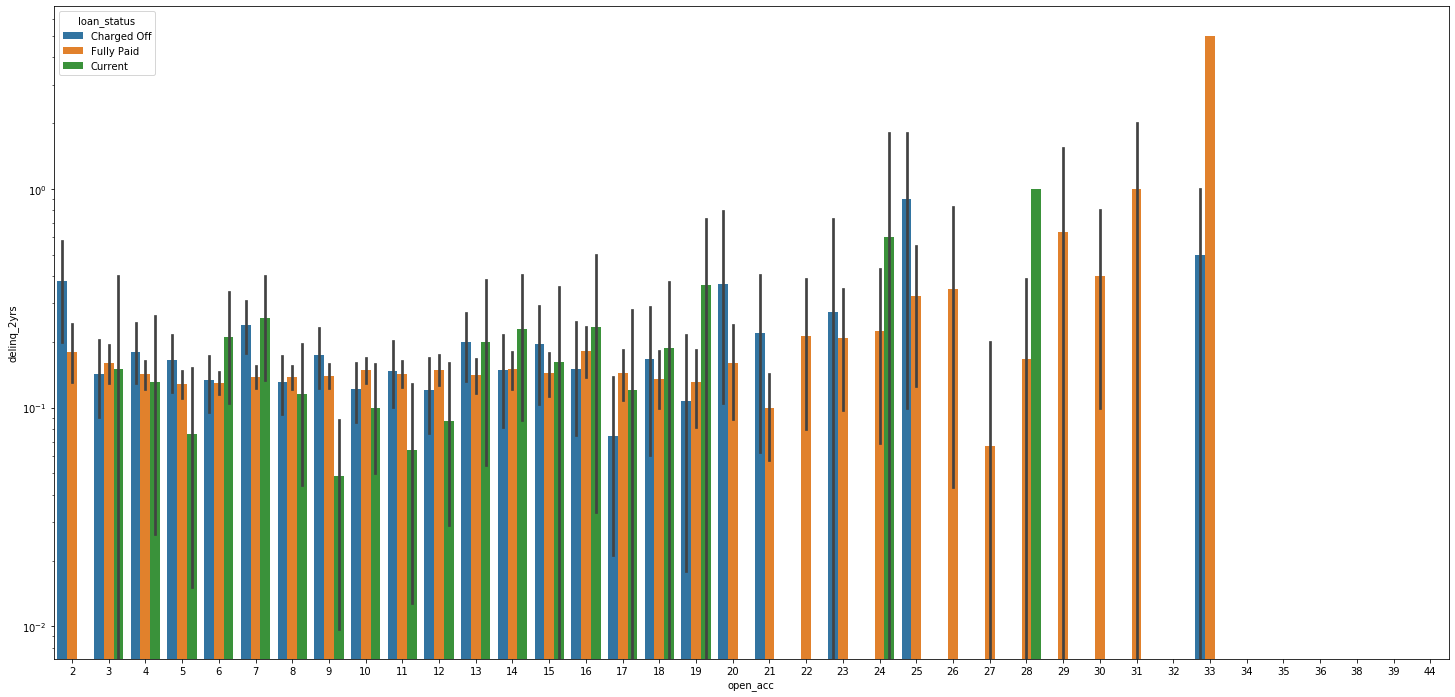

In [170]:
plt.figure(figsize=(25,12))
ax = sns.barplot(x='open_acc', y='delinq_2yrs',hue='loan_status',data= df_master)
ax.set_yscale('log')
plt.show()

#### No clear inferenece from here, let us analyse this with a heatplot

## Making the heatplot

##### First we will create a variable, corr_var which will only contain the columns that we have analysed so far.
##### Then we will plot the heatmap

In [171]:
## creating corr_var
corr_var= ['loan_amnt', 'int_rate%', 'installment',
       'emp_length_years', 'annual_inc',
       'dti', 'delinq_2yrs','loan_status', 'earliest_cr_line',
        'open_acc', 'pub_rec',
       'total_acc', 'last_pymnt_amnt',
       'pub_rec_bankruptcies']

In [172]:
## defining corelation
corr = df_master[corr_var].corr()

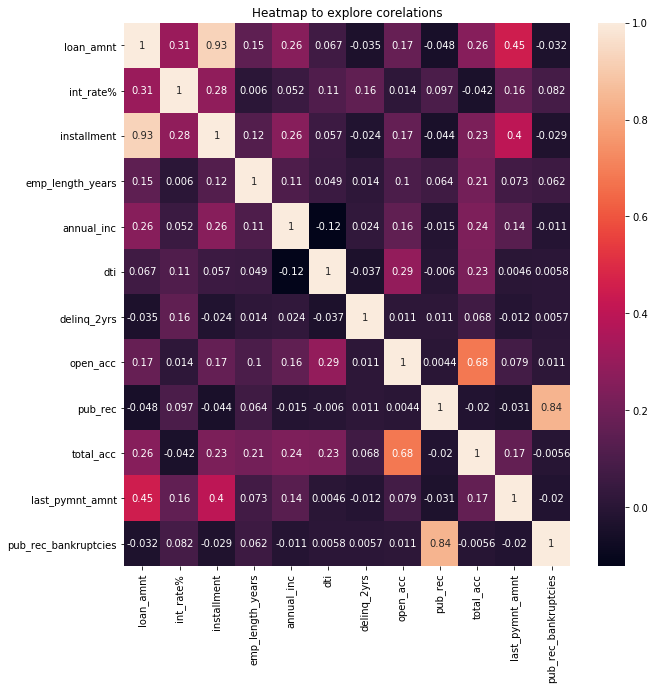

In [173]:
## plotting the heat map
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.title('Heatmap to explore corelations')
plt.show()

#### Loan amount has a very high co-relation with installments
#### Considering the general trend here, the co-relation between loan amount and last payment amount.